<a href="https://colab.research.google.com/github/Arabasma/ML-and-NLP-Projects/blob/main/Projet_Classification_automatique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projet " Apprentissage Supervisé "**



*   L'objectif de ce projet est  l'application et la comparaison des diverses méthodes de classification automatique à savoir Régression logistique, SVM, Naive Bayes, KNN, Random Forest, CART ... en utilisant deux  types de datasets. Le premier dataset contient les données bancaires et personnelles de clients, ce dataset sera utilisé pour entrainer un modèle afin de déterminer si un client est bon ou mauvais par rapport à sa capacité à rembourser ou non son crédit. Le deuxième dataset  est sous la forme de données relationnelles représentées avec deux types d’information, une matrice des valeurs objets/caractéristiques et un graphe des liens entre objets


*   A travers ce notebook nous allons présenter les étapes suivis pour chacun des datasets, du preprocessing jusqu'à l'entrainement et l'évaluation des divers modèles, ainsi que l'analyse des résultats obtenues





# Partie 1 : Données Crédits bancaires

## Importation des librairies

In [ ]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
import warnings

## Analyse et classification des données crédits bancaires



### Description du dataset

> Le dataset utilisé dans cette partie est le fichier german.csv, ils comporte les données de 1000 clients décrits avec 20 variables dont 13 catégorielles et 7 numériques, une colonne présentant la catégorie de chaque client avec pour valeur 1 quand le client est bon ( Good) et 2 quand le client est mauvais (Bad)

les variables catégorielles ont été codés comme suit :


*   **Attribut 1** : Statut du compte existant    
         

```
           A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM  
           A14 : no checking account
```


*   **Attribut 2** : Durée en mois
* **Attribut 3**    : Historique Crédit


```
           A30 : aucun crédit pris / tous les crédits remboursés en bonne et due forme
		       
           A31 : tous les crédits de cette banque ont été dûment remboursés
	       A32 : crédits existants dûment remboursés jusqu'à présent
           A33 : retard de paiement dans le passé
	       A34 : compte critique/autres crédits existants (pas dans cette banque)
```

*  **Attribut 4** : Objectif


```
          A40 : Voitutre (nouvelle)
	      A41 : Voiture (utilisé)
	      A42 : fourniture (équipement)
	      A43 : radion/télévision
	      A44 : appareils ménagers
	      A45 : réparations
	      A46 : éducation
	      A47 : vacances
	      A48 : reconversion professionnelle
	      A49 : business
	      A410 : autre
```

*  **Attribut 5** : Montant crédit

* **Atrribut 6** : Compte d'épargne/obligations


```
          A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
          A65 :   inconnu/ pas de compte d'épargne
```

* **Attribut 7** : Emploi actuel depuis


```
          A71 : sans emploi
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years
```

*  **Attribut 8** : Taux de versement en pourcentage du revenu disponible

*  **Attribut 9** : Statut personnel et sexe


```
         A91 : homme   : divorcé/separé
	     A92 : femme : divorcé/separé/marié
         A93 : homme  : célibataire
	     A94 : homme   : marié/ veuf
	     A95 : femme : célibataire

```

*  **Attribut 10** : Autres débiteurs/garants


```
         A101 : aucun
	     A102 : co-demandeur
	     A103 : guarant
```


*  **Attribut 11** : Résidence actuelle depuis

*  **Attribut 12** : Propriété

```
         A121 : immobilier
	     A122 : si ce n'est pas A121 : contrat d'épargne de la société de construction/ assurance vie
         A123 : si ce n'est pas A121/A122 : voiture ou autre, pas dans l'attribut 6
	     A124 : inconnu / pas de propriété
```

*  **Attribut 13** : Age

*  ** Attribut 14** : autres plans de versements

```
         A141 : banque
	     A142 : magasins
	     A143 : aucun
```

* **Attribut 15** : Logement

```
         A151 : location
	     A152 : proproétaire
	     A153 : gratuit
```

*  **Attribut 16** : Nombre de crédits existants dans cette banque

*  **Attribut 17** : Emploi

```
         A171 : sans emploi/ non qualifié - non résident
	     A172 : non qualifié - résident
	     A173 : employé qualifié / officiel
	     A174 : gestion/ à son compte/  officier /agent hautement qualifié
		    
```

*  **Attribut 18** : Nombre de personnes à charge
*  **Attribut 19** : Telephone

```
         A191 : aucun
	     A192 : oui, enregistré sous le nom du client
```

*  **Attribut 20** : Travailleur étranger

```
          AA201 : oui
	      A202 : non
```


### Préparation du dataset

In [ ]:
# Importation du dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv'
dataset = read_csv(url, header=None)
column_names = ["Statut compte", "Durée","Historique crédit","Objectif","Montant crédit", "Compte épargne","Emploi actuel", "Taux versement", "Statut personnel et sexe", "Autres débiteurs", "Résidence actuelle", "Propriété", "Age", "Plan versement", "Logement","Nbr crédit", "Travail", "Nbr personnes à charge", "Telephone", "Travailleur étranger", "Classe" ]
dataset.columns = column_names

In [ ]:
dataset

,Statut compte,Durée,Historique crédit,Objectif,Montant crédit,Compte épargne,Emploi actuel,Taux versement,Statut personnel et sexe,Autres débiteurs,Résidence actuelle,Propriété,Age,Plan versement,Logement,Nbr crédit,Travail,Nbr personnes à charge,Telephone,Travailleur étranger,Classe
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


### Etude exploratoire préliminaire

> #### Analyse univarié

Dans cette partie nous allons exploré toutes les variables pour voir la distribution et les valeurs prises par ces dernières

In [ ]:
# Résumé des données

# Statistiques descriptive
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())
# class distribution
print(dataset.groupby("Classe").size())

(1000, 21)
Statut compte               object
Durée                        int64
Historique crédit           object
Objectif                    object
Montant crédit               int64
Compte épargne              object
Emploi actuel               object
Taux versement               int64
Statut personnel et sexe    object
Autres débiteurs            object
Résidence actuelle           int64
Propriété                   object
Age                          int64
Plan versement              object
Logement                    object
Nbr crédit                   int64
Travail                     object
Nbr personnes à charge       int64
Telephone                   object
Travailleur étranger        object
Classe                       int64
dtype: object
   Statut compte  Durée  ... Travailleur étranger Classe
0            A11      6  ...                 A201      1
1            A12     48  ...                 A201      2
2            A14     12  ...                 A201      1
3           

>  On peut constater que les données ne sont pas balancés, en effet on a plus d'individus dans la classe 1 que la classe 2. Ceci peut proposer un problème lors de l'entraînement des modèles, il est nécessaire d'y remédier avant d'effectuer la classification

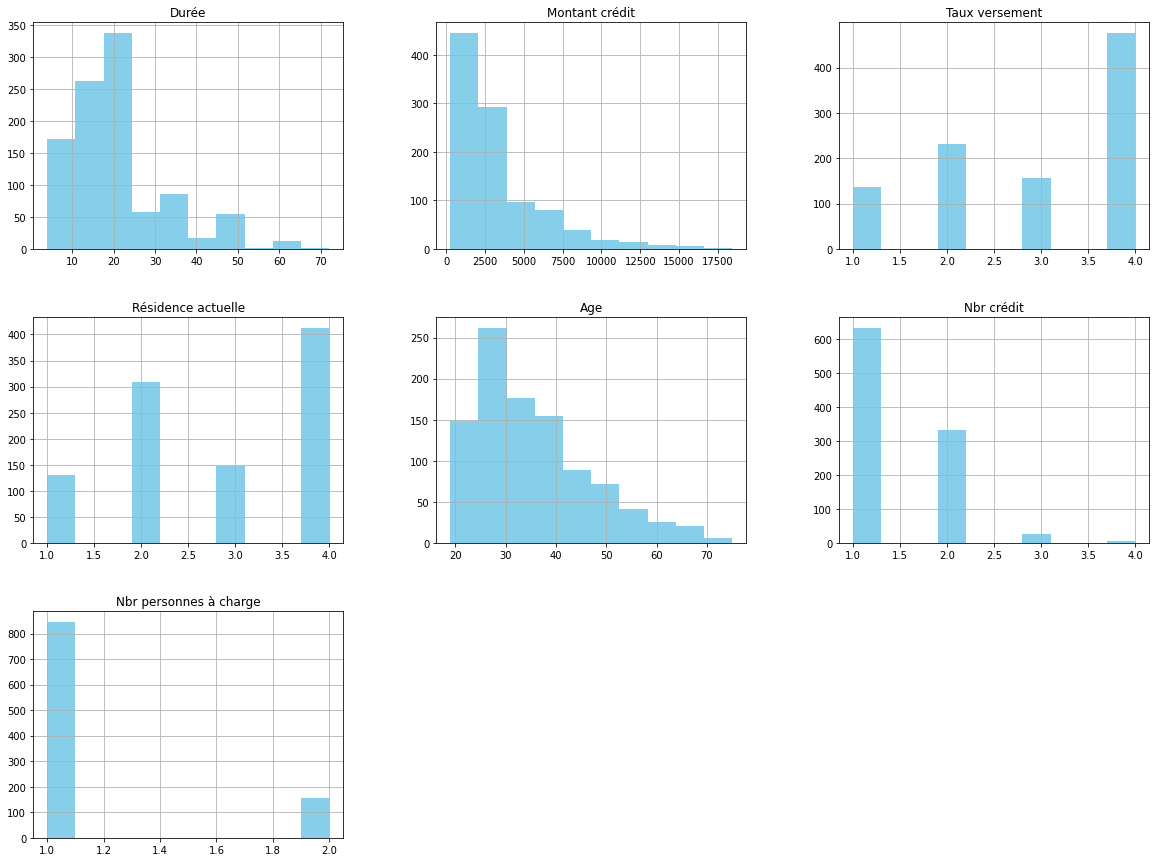

In [ ]:
# Visualisation des données pour les variables numériques
# histograms
dataset.hist(column=["Durée","Montant crédit","Taux versement","Résidence actuelle","Age", "Nbr crédit", "Nbr personnes à charge"], figsize = (20,15), ylabelsize = 10, xlabelsize = 10, color = 'skyblue')
pyplot.show()


In [ ]:
# Visualisation des données pour les variables catégorielles
plot1 = pd.DataFrame(dataset['Statut compte'].value_counts())
plot1.reset_index(level=0, inplace=True)

plot2 = pd.DataFrame(dataset['Historique crédit'].value_counts())
plot2.reset_index(level=0, inplace=True)

plot3 = pd.DataFrame(dataset['Objectif'].value_counts())
plot3.reset_index(level=0, inplace=True)

plot4 = pd.DataFrame(dataset['Compte épargne'].value_counts())
plot4.reset_index(level=0, inplace=True)

plot5 = pd.DataFrame(dataset['Emploi actuel'].value_counts())
plot5.reset_index(level=0, inplace=True)

plot6 = pd.DataFrame(dataset['Statut personnel et sexe'].value_counts())
plot6.reset_index(level=0, inplace=True)

plot7 = pd.DataFrame(dataset['Autres débiteurs'].value_counts())
plot7.reset_index(level=0, inplace=True)

plot8 = pd.DataFrame(dataset['Propriété'].value_counts())
plot8.reset_index(level=0, inplace=True)

plot9 = pd.DataFrame(dataset['Plan versement'].value_counts())
plot9.reset_index(level=0, inplace=True)

plot10 = pd.DataFrame(dataset['Logement'].value_counts())
plot10.reset_index(level=0, inplace=True)

plot11 = pd.DataFrame(dataset['Travail'].value_counts())
plot11.reset_index(level=0, inplace=True)

plot12 = pd.DataFrame(dataset['Telephone'].value_counts())
plot12.reset_index(level=0, inplace=True)

plot13 = pd.DataFrame(dataset['Travailleur étranger'].value_counts())
plot13.reset_index(level=0, inplace=True)


Text(0.5, 1.0, 'Travailleur étranger')

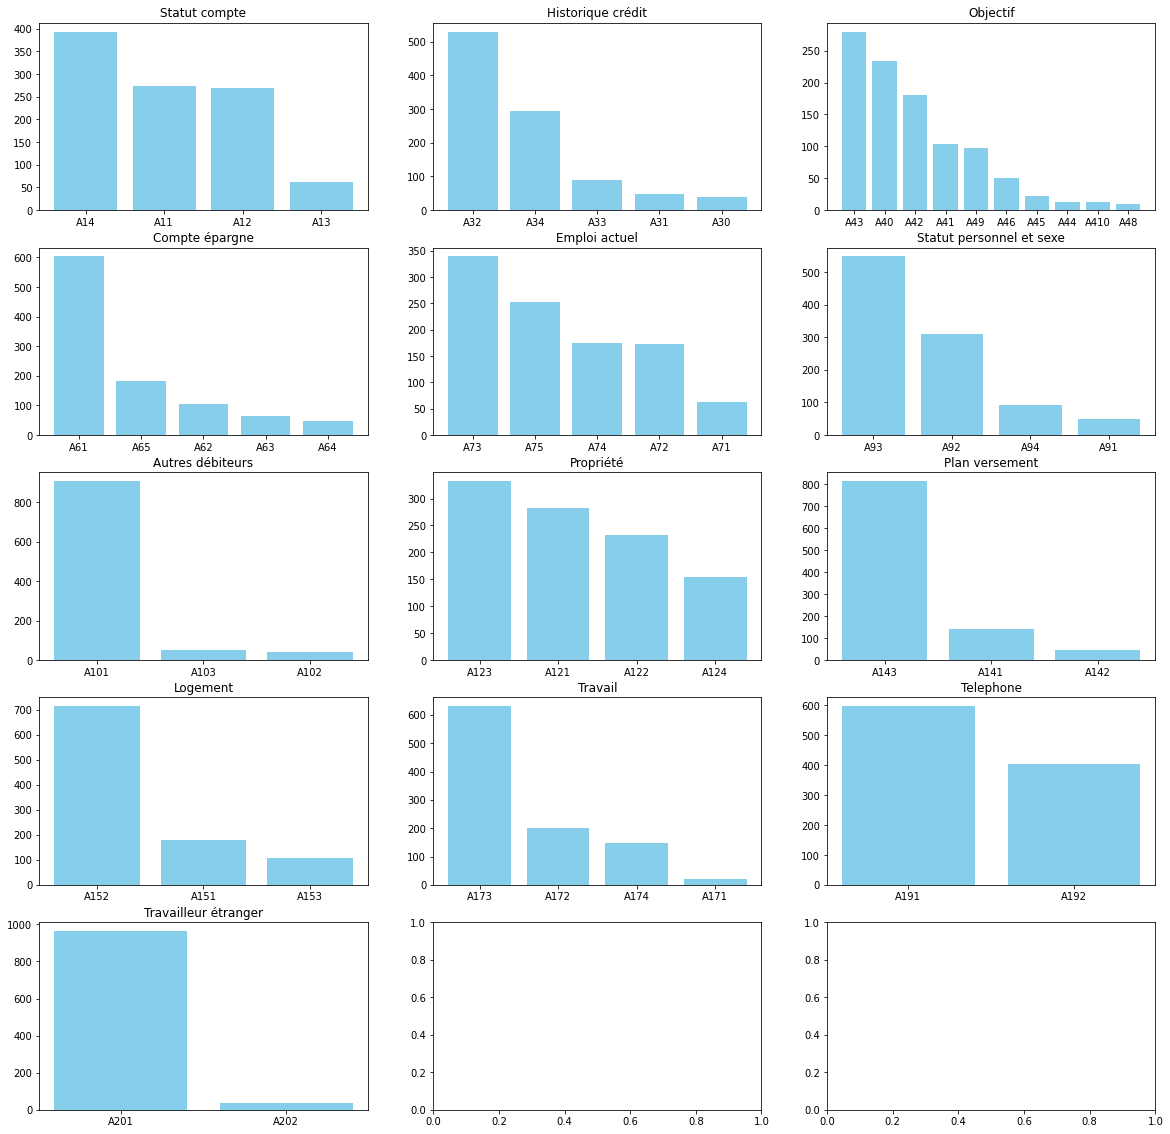

In [ ]:
fig, axs = plt.subplots(5, 3, figsize = (20,20))
axs[0, 0].bar(plot1['index'], height = plot1['Statut compte'], color = 'skyblue' )
axs[0, 0].set_title('Statut compte')
axs[0, 1].bar(plot2['index'], height = plot2['Historique crédit'], color = 'skyblue' )
axs[0, 1].set_title('Historique crédit')
axs[0, 2].bar(plot3['index'], height = plot3['Objectif'], color = 'skyblue' )
axs[0, 2].set_title('Objectif')
axs[1, 0].bar(plot4['index'], height = plot4['Compte épargne'], color = 'skyblue' )
axs[1, 0].set_title('Compte épargne')
axs[1, 1].bar(plot5['index'], height = plot5['Emploi actuel'], color = 'skyblue' )
axs[1, 1].set_title('Emploi actuel')
axs[1, 2].bar(plot6['index'], height = plot6['Statut personnel et sexe'], color = 'skyblue' )
axs[1, 2].set_title('Statut personnel et sexe')
axs[2, 0].bar(plot7['index'], height = plot7['Autres débiteurs'], color = 'skyblue' )
axs[2, 0].set_title('Autres débiteurs')
axs[2, 1].bar(plot8['index'], height = plot8['Propriété'], color = 'skyblue' )
axs[2, 1].set_title('Propriété')
axs[2, 2].bar(plot9['index'], height = plot9['Plan versement'], color = 'skyblue' )
axs[2, 2].set_title('Plan versement')
axs[3, 0].bar(plot10['index'], height = plot10['Logement'], color = 'skyblue' )
axs[3, 0].set_title('Logement')
axs[3, 1].bar(plot11['index'], height = plot11['Travail'], color = 'skyblue' )
axs[3, 1].set_title('Travail')
axs[3, 2].bar(plot12['index'], height = plot12['Telephone'], color = 'skyblue' )
axs[3, 2].set_title('Telephone')
axs[4, 0].bar(plot13['index'], height = plot13['Travailleur étranger'], color = 'skyblue' )
axs[4, 0].set_title('Travailleur étranger')



In [ ]:
df = dataset.copy()
df.drop(columns='Classe', inplace=True, axis=1)

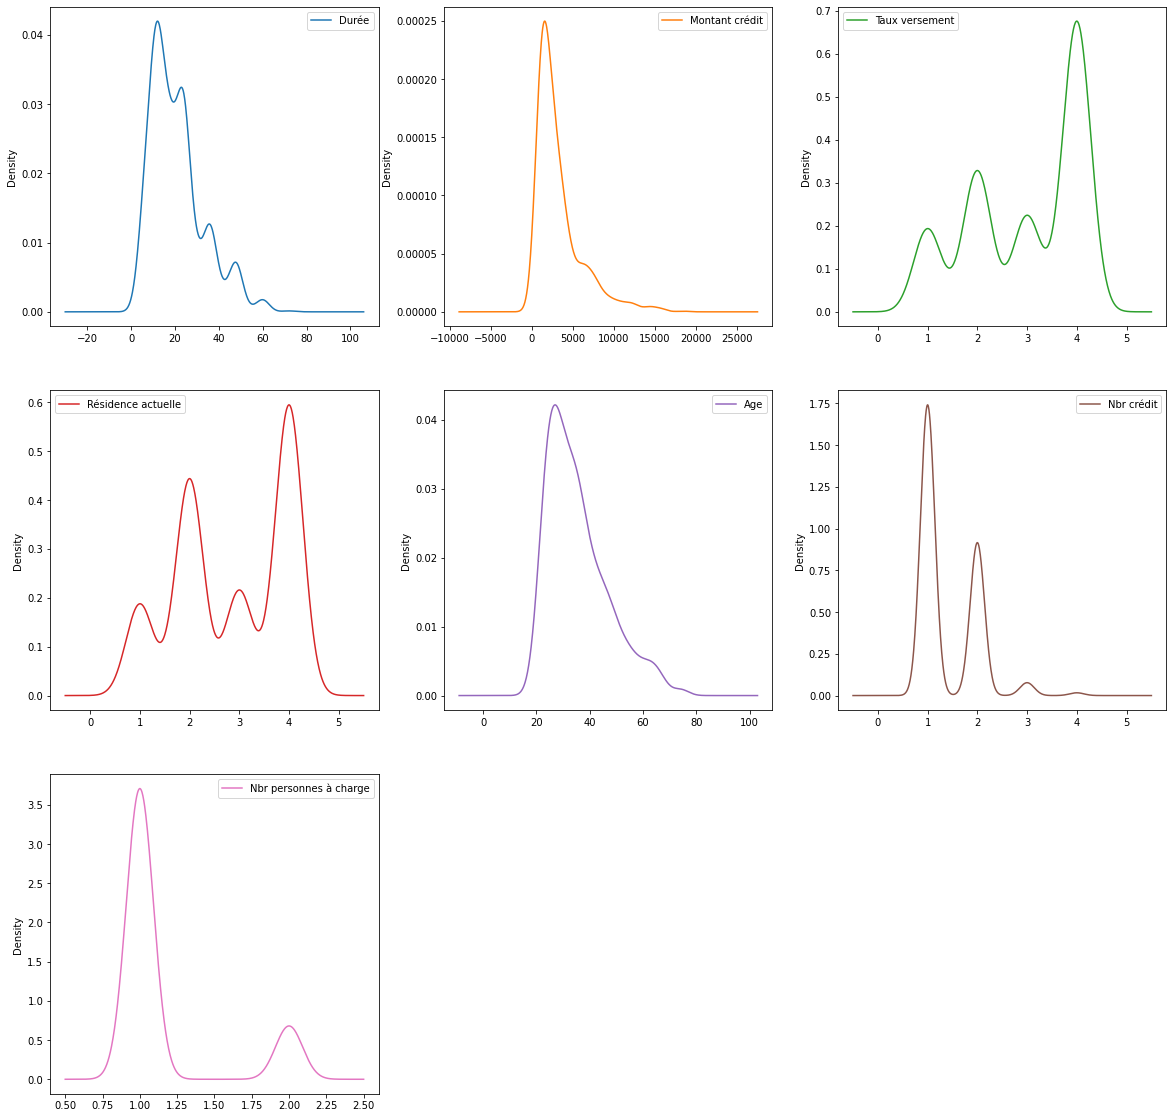

In [ ]:
# density pour les variables quantitatives
df.plot(kind='density', subplots=True, layout=(3,3), figsize = (20,20), sharex=False)
pyplot.show()

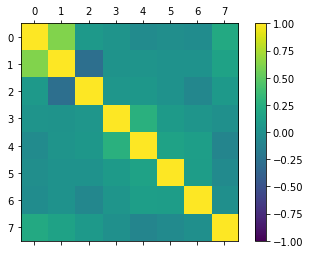

In [ ]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

> #### Analyse Bivarié

> ##### Variables quantitatives

In [ ]:
df = dataset.copy()
df.loc[df['Classe'] == 1, 'Classe'] = 'Good'
df.loc[df['Classe'] == 2, 'Classe'] = 'Bad'

In [ ]:
SC =df.loc[:,['Nbr crédit','Classe']]
fig = px.box(SC, x="Classe", y="Nbr crédit", points="all", color="Classe")
fig.update_traces() # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Nbr crédit et Classe",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Classe",
    yaxis_title="Nbr crédit",


)

In [ ]:
SC =df.loc[:,['Résidence actuelle','Classe']]
fig = px.box(SC, x="Classe", y="Résidence actuelle", points="all", color="Classe")
fig.update_traces() # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Résidence actuelle et Classe",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Classe",
    yaxis_title="Résidence actuelle",


)

In [ ]:
SC =df.loc[:,['Taux versement','Classe']]
fig = px.box(SC, x="Classe", y="Taux versement", points="all", color="Classe")
fig.update_traces() # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Taux versement et Classe",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Classe",
    yaxis_title="Taux versement",


)

In [ ]:
SC =df.loc[:,['Montant crédit','Classe']]
fig = px.box(SC, x="Classe", y="Montant crédit", points="all", color="Classe")
fig.update_traces() # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Montant crédit et Classe",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Classe",
    yaxis_title="Montant crédit",



)

In [ ]:
SC =df.loc[:,['Durée','Classe']]
fig = px.box(SC, x="Classe", y="Durée", points="all", color="Classe")
fig.update_traces() # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Durée et Classe",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Classe",
    yaxis_title="Durée",



)

In [ ]:
SC =df.loc[:,['Age','Classe']]
fig = px.box(SC, x="Classe", y="Age", points="all", color="Classe")
fig.update_traces() # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Age et Classe",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Classe",
    yaxis_title="Age",



)
fig.show()

> ##### Variables qualitatives

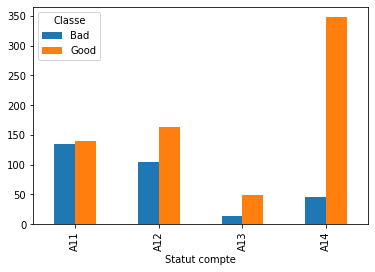

In [ ]:
CrosstabResult=pd.crosstab(index=df['Statut compte'],columns=df['Classe'])
CrosstabResult.plot.bar()

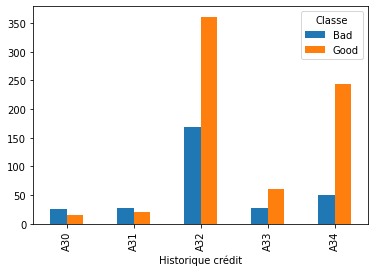

In [ ]:
CrosstabResult=pd.crosstab(index=df['Historique crédit'],columns=df['Classe'])
CrosstabResult.plot.bar()

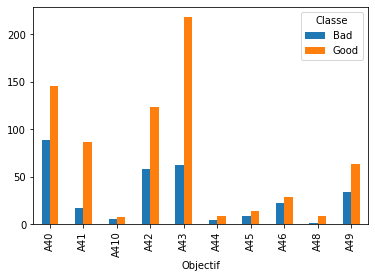

In [ ]:
CrosstabResult=pd.crosstab(index=df['Objectif'],columns=df['Classe'])
CrosstabResult.plot.bar()

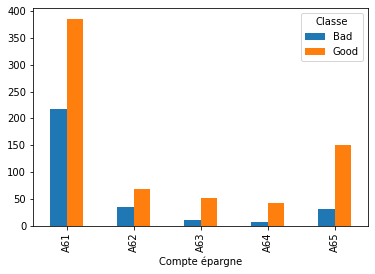

In [ ]:
CrosstabResult=pd.crosstab(index=df['Compte épargne'],columns=df['Classe'])
CrosstabResult.plot.bar()

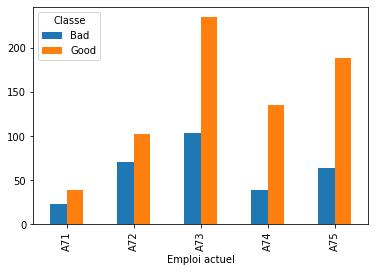

In [ ]:
CrosstabResult=pd.crosstab(index=df['Emploi actuel'],columns=df['Classe'])
CrosstabResult.plot.bar()

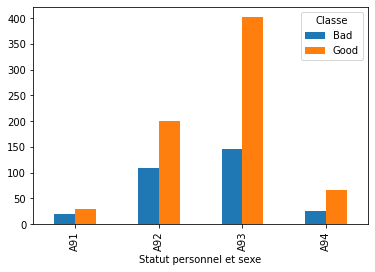

In [ ]:
CrosstabResult=pd.crosstab(index=df['Statut personnel et sexe'],columns=df['Classe'])
CrosstabResult.plot.bar()

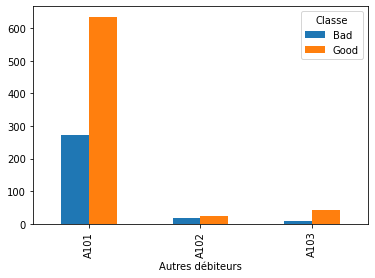

In [ ]:
CrosstabResult=pd.crosstab(index=df['Autres débiteurs'],columns=df['Classe'])
CrosstabResult.plot.bar()

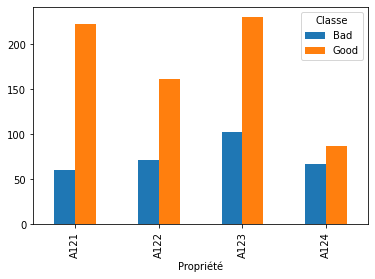

In [ ]:
CrosstabResult=pd.crosstab(index=df['Propriété'],columns=df['Classe'])
CrosstabResult.plot.bar()

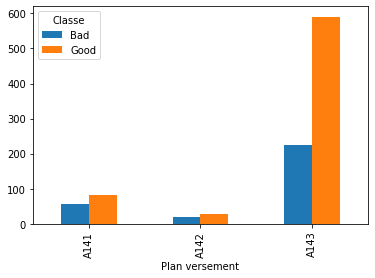

In [ ]:
CrosstabResult=pd.crosstab(index=df['Plan versement'],columns=df['Classe'])
CrosstabResult.plot.bar()

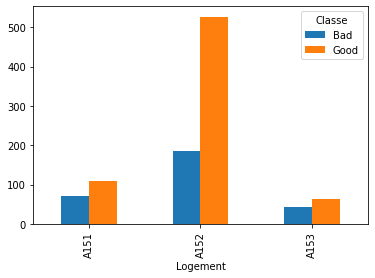

In [ ]:
CrosstabResult=pd.crosstab(index=df['Logement'],columns=df['Classe'])
CrosstabResult.plot.bar()

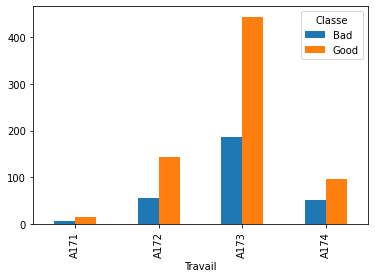

In [ ]:
CrosstabResult=pd.crosstab(index=df['Travail'],columns=df['Classe'])
CrosstabResult.plot.bar()

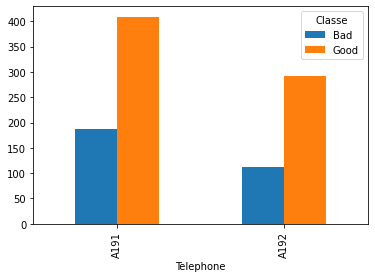

In [ ]:
CrosstabResult=pd.crosstab(index=df['Telephone'],columns=df['Classe'])
CrosstabResult.plot.bar()

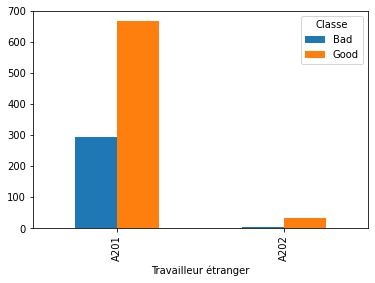

In [ ]:
CrosstabResult=pd.crosstab(index=df['Travailleur étranger'],columns=df['Classe'])
CrosstabResult.plot.bar()

### Classification avec divers algorithmes

> #### Transformation du dataset

Etant donné le dataset comporte des variables catégorielles il est nécessaire d'opérer certaines transformations pour pouvoir appliquer les algorithmes qui ne prennent que des variables quantitatives, pour celà nous effectuant un one hot encoding pour les 13 variables quantitatives. De plus ce dataset présente un cas d'imbalanced data en effet on 300 individu dans la classe 2 (Bad) et 700 dans la classe 1 (good), On résout ce problème avec une combinaison du oversampling et undersampling

In [ ]:
#Séparation du dataset: X contient les variables d'entrée et Y la classe
X_dataset = dataset.copy()
X_dataset.drop(columns='Classe', inplace=True, axis=1)
selected_columns_Y = dataset["Classe"]
Y_dataset =  selected_columns_Y.copy()

In [ ]:
#Encodage des variables catégorielles un codage binaire
ohe = OneHotEncoder()
ohe.fit(X_dataset)
X_encode = ohe.transform(X_dataset)

In [ ]:
# Résoudre le problème de imbalanced data
# avec une combinaison du over sampling et undersampling
#Oversampling
over = SMOTE(sampling_strategy=0.8)
X_train_SMOTE, y_train_SMOTE = over.fit_resample(X_encode, Y_dataset)
#Undersampling
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_balanced, Y_balanced = undersample.fit_resample(X_train_SMOTE, y_train_SMOTE)
# Evaluation
model = SVC()
scores = cross_val_score(model, X_balanced, Y_balanced, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)


ROC AUC score for the combined sampling method: 0.895


> #### Classification

In [ ]:
scoring = ['accuracy', 'f1_macro', 'normalized_mutual_info_score']
num_folds = 10
seed = 7

> ##### Régression logistique

In [ ]:
def logisticRegression(X, Y, scoring):

  model = LogisticRegression()
  c_values = [200,100, 10, 1.0, 0.1, 0.01]
  max_iter = [400, 500, 600,700]
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  grid_search = GridSearchCV(estimator=model, param_grid=dict(C=c_values, max_iter = max_iter), n_jobs=-1,
                            refit='accuracy', cv=kfold, scoring=scoring, return_train_score=True)
  grid_search.fit(X, Y)

  return {"name": "Logistic regression",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
lr = logisticRegression( X_balanced, Y_balanced, scoring)
lr

{'best_param': {'C': 100, 'max_iter': 400},
 'name': 'Logistic regression',
 'test_NMI': 0.38909203309841733,
 'test_accuracy': 0.8420634920634921,
 'test_f1': 0.8407340339510851,
 'train_NMI': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0}

> ##### Multinomial NB

In [ ]:
def multinomialNB(X, Y, scoring):

  model = MultinomialNB()
  alpha_values= [0.01, 0.02, 0.03, 0.04, 0.1, 1.0, 10.0]
  grid_search = GridSearchCV(estimator=model, param_grid=dict(alpha=alpha_values), n_jobs=-1,
                            refit='accuracy', cv=5, scoring=scoring, return_train_score=True)
  grid_search.fit(X, Y)

  return {"name": "Multinomial NB",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
nb = multinomialNB(X_balanced, Y_balanced, scoring)
nb

{'best_param': {'alpha': 0.03},
 'name': 'Multinomial NB',
 'test_NMI': 0.3479018189968833,
 'test_accuracy': 0.8015873015873016,
 'test_f1': 0.8010103270450291,
 'train_NMI': 0.89429675209807,
 'train_accuracy': 0.986111111111111,
 'train_f1': 0.9859372748175229}

> ##### SVM

In [ ]:
def SVM(X, Y, scoring):

  model = SVC()
  c_values = [ 3.0, 3.5, 4.0, 4.5, 5.0,5.3, 5.4, 5.5, 6.0, 7.0]
  kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
  param_grid = dict(C=c_values, kernel=kernel_values)

  grid_search = GridSearchCV(estimator=model, param_grid= param_grid,
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y)

  return {"name": "Linear SVM",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
svm = SVM(X_balanced, Y_balanced, scoring)
svm

{'best_param': {'C': 5.0, 'kernel': 'poly'},
 'name': 'Linear SVM',
 'test_NMI': 0.4648850025319497,
 'test_accuracy': 0.8603174603174605,
 'test_f1': 0.8598939471187862,
 'train_NMI': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0}

> ##### CART

In [ ]:
def decisionTree(X, Y, scoring):

  model = DecisionTreeClassifier()

  criterion_values = ['gini', 'entropy']
  max_depth_values = [2,4,6,8,10,11,12]


  grid_search = GridSearchCV(estimator=model, param_grid=dict(criterion=criterion_values, max_depth= max_depth_values),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y)

  return {"name": "Decision tree",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
cart = decisionTree(X_balanced, Y_balanced, scoring)
cart

{'best_param': {'criterion': 'gini', 'max_depth': 12},
 'name': 'Decision tree',
 'test_NMI': 0.23592779049698587,
 'test_accuracy': 0.757936507936508,
 'test_f1': 0.7486778265605798,
 'train_NMI': 0.7564690805887156,
 'train_accuracy': 0.9597222222222221,
 'train_f1': 0.9592048622314395}

> ##### Random Forest

In [ ]:
def randomForest(X, Y, scoring):

  model = RandomForestClassifier()

  n_estimators_values = [10, 100,120 , 150, 200, 1000,1500, 2000, 2500, 3000]
  max_features_values = ['sqrt', 'log2']


  grid_search = GridSearchCV(estimator=model, param_grid=dict(n_estimators=n_estimators_values, max_features=max_features_values ),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y)

  return {"name": "Random forest",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
rf = randomForest(X_balanced, Y_balanced, scoring)
rf

{'best_param': {'max_features': 'log2', 'n_estimators': 2000},
 'name': 'Random forest',
 'test_NMI': 0.47987010901636185,
 'test_accuracy': 0.8301587301587302,
 'test_f1': 0.8084808851417258,
 'train_NMI': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0}

> ##### KNN

In [ ]:
def KNN(X, Y, scoring):

  model = KNeighborsClassifier()
  neighbors = [1,2,3,5,7,9,11,13,15,17,19,21]
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  grid_search = GridSearchCV(estimator=model, param_grid=dict(n_neighbors=neighbors),n_jobs=-1,refit='accuracy', scoring=scoring, cv=kfold, return_train_score=True)
  grid_search.fit(X, Y)


  return {"name": "KNN",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}


In [ ]:
knn = KNN(X_balanced, Y_balanced, scoring)
knn

{'best_param': {'n_neighbors': 2},
 'name': 'KNN',
 'test_NMI': 0.2871357282127191,
 'test_accuracy': 0.7841269841269841,
 'test_f1': 0.7825209847664099,
 'train_NMI': 0.8671498899872343,
 'train_accuracy': 0.9778659611992946,
 'train_f1': 0.9774587718034015}

> ##### XGBoost

In [ ]:
#https://xgboost.readthedocs.io/en/stable/python/python_api.html

def xgboost(X, Y, scoring):

  model = xgb.XGBClassifier()
  param_grid_values = {
    'n_estimators': [10, 100, 1000, 1500],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [15,20,25],
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    #'subsample': [0.7, 0.8, 0.9]
}

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid_values, n_jobs=-1,refit='accuracy',
                             cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y)

  return {"name": "Xgboost",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
xg = xgboost(X_balanced, Y_balanced, scoring)
xg

{'best_param': {'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 100},
 'name': 'Xgboost',
 'test_NMI': 0.35409414038963344,
 'test_accuracy': 0.7968253968253968,
 'test_f1': 0.7822836201719964,
 'train_NMI': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0}

> ##### GradientBoosting

In [ ]:
def gradientBoosting(X, Y, scoring):

  model = GradientBoostingClassifier()

  n_estimators_values = [10, 100,200, 300, 400, 1000, 1200, 1500, 2000]
  max_features_values = ['sqrt', 'log2']
  max_depth_values=   [15,20,25]



  grid_search = GridSearchCV(estimator=model, param_grid=dict(n_estimators=n_estimators_values, max_features=max_features_values, max_depth=max_depth_values ),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y)

  return {"name": "Gradient Boosting",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
gb = gradientBoosting(X_balanced, Y_balanced, scoring)
gb

{'best_param': {'max_depth': 25, 'max_features': 'log2', 'n_estimators': 100},
 'name': 'Gradient Boosting',
 'test_NMI': 0.45071778818326447,
 'test_accuracy': 0.8388888888888889,
 'test_f1': 0.8268595022863098,
 'train_NMI': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0}

> ##### Adaboost

In [ ]:
def adaBoost(X, Y, scoring):

  model = AdaBoostClassifier()

  n_estimators_values = [10, 100,150 , 1000, 1500, 2000]

  grid_search = GridSearchCV(estimator=model, param_grid=dict(n_estimators=n_estimators_values),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y)

  return {"name": "Ada Boost",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

In [ ]:
ad = adaBoost(X_balanced, Y_balanced, scoring)
ad

{'best_param': {'n_estimators': 100},
 'name': 'Ada Boost',
 'test_NMI': 0.3144126956472578,
 'test_accuracy': 0.7841269841269841,
 'test_f1': 0.7721613584827243,
 'train_NMI': 0.45816630999014674,
 'train_accuracy': 0.8763888888888889,
 'train_f1': 0.8744159900260804}

> #### Evaluation des algorithmes

> ##### Graphes des métriques

Nous allons dessiner les graphes des des métriques pour chaque algorithme de classification afin de comparer les valeurs obtenues entre les diverses méthodes et entre les valeurs du train set et du test set

In [ ]:
#Fonction pour la visualisation des résultats
def plot_results(model0, model1, model2, model3, model4, model5, model6, model7, model8):

    plt.subplots(1,4,figsize=(20,8))

    metrics = ['Accuracy','F1-measure','NMI']
    X_axis = np.arange(len(metrics))

    plt.subplot(1, 4, 1)
    train = [model0["train_accuracy"], model0["train_f1"], model0["train_NMI"]]
    test= [model0["test_accuracy"], model0["test_f1"], model0["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model0["name"])+"\n"+ str(model0["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 2)
    train = [model1["train_accuracy"], model1["train_f1"], model1["train_NMI"]]
    test= [model1["test_accuracy"], model1["test_f1"], model1["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model1["name"])+"\n"+ str(model1["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 3)
    train = [model2["train_accuracy"], model2["train_f1"], model2["train_NMI"]]
    test= [model2["test_accuracy"], model2["test_f1"], model2["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model2["name"])+"\n"+ str(model2["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 4)
    train = [model3["train_accuracy"], model3["train_f1"], model3["train_NMI"]]
    test= [model3["test_accuracy"], model3["test_f1"], model3["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model3["name"])+"\n"+ str(model3["best_param"]))
    plt.legend()


    plt.subplots(1,4,figsize=(20,8))

    plt.subplot(1, 4, 1)
    train = [model4["train_accuracy"], model4["train_f1"], model4["train_NMI"]]
    test= [model4["test_accuracy"], model4["test_f1"], model4["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model4["name"])+"\n"+ str(model4["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 2)
    train = [model5["train_accuracy"], model5["train_f1"], model5["train_NMI"]]
    test= [model5["test_accuracy"], model5["test_f1"], model5["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model5["name"])+"\n"+ str(model5["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 3)
    train = [model6["train_accuracy"], model6["train_f1"], model6["train_NMI"]]
    test= [model6["test_accuracy"], model6["test_f1"], model6["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model6["name"])+"\n"+ str(model6["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 4)
    train = [model7["train_accuracy"], model7["train_f1"], model7["train_NMI"]]
    test= [model7["test_accuracy"], model7["test_f1"], model7["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model7["name"])+"\n"+ str(model7["best_param"]))
    plt.legend()

    plt.subplots(1,4,figsize=(20,8))

    plt.subplot(1, 4, 1)
    train = [model8["train_accuracy"], model8["train_f1"], model8["train_NMI"]]
    test= [model8["test_accuracy"], model8["test_f1"], model8["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model8["name"])+"\n"+ str(model8["best_param"]))
    plt.legend()

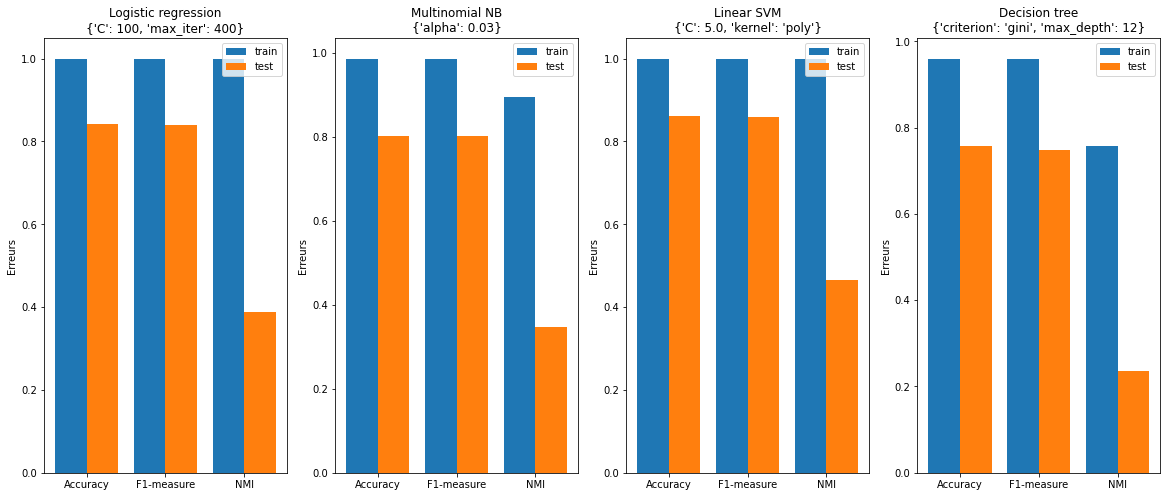

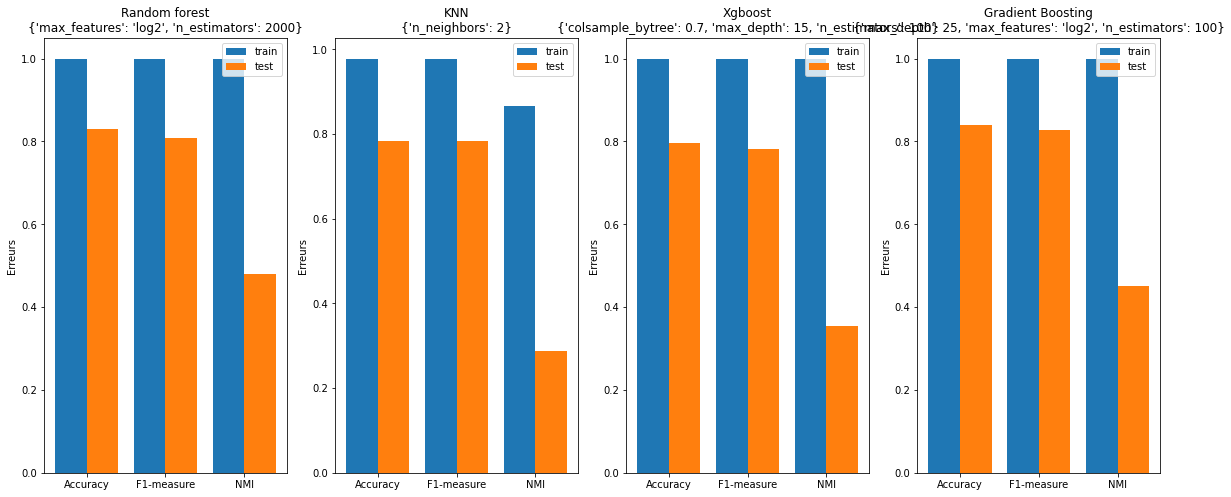

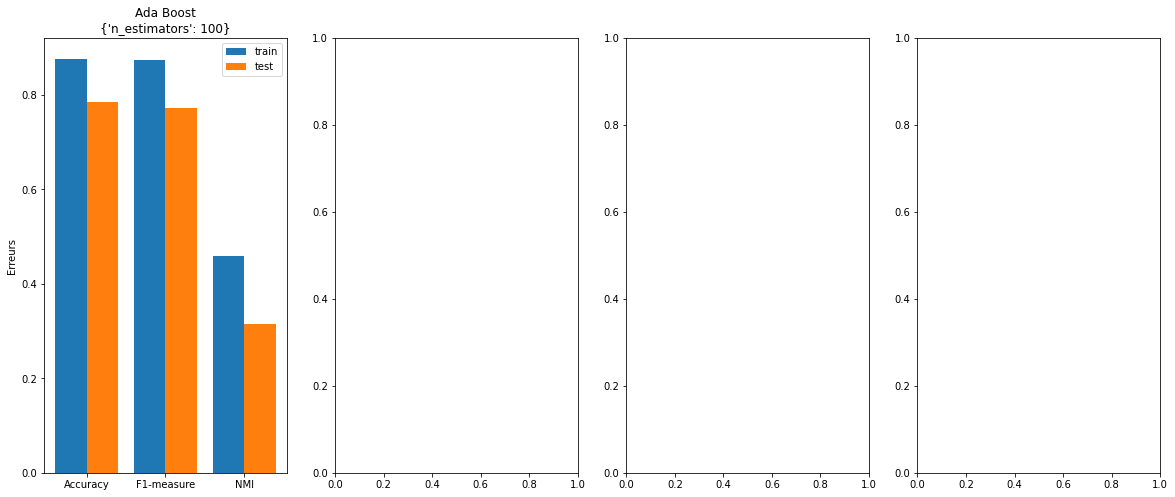

In [ ]:
plot_results(lr,nb,svm,cart,rf,knn,xg,gb,ad)

> ##### Analyse des résultats

*  Nous pouvons constater en premier que la plus part des modèles ont données de très bons résultats pour les métriques accuracy et F1-measure avec un écart acceptable entre le traning set et le testing set. La NMI par contre est plus petite, ce qui peut être un indicateur d'overfitting

*  Le gridsearch  nous a permis d'avoir les meilleurs valeurs pour les hyperparamètres de chaque méthode.

*  Les résultats de La régression logistique  sont bons car les variables d'entrée sont assez indépendants et la classification est binaire. Mais comme il ne peut pas supporter les solutions non linéaires, ses résultats sont moins bon comparés de SVM et Naive Bayes

*  Random forest a donné de meilleurs résultats que decision tree, car c'est un algorithme plutôt robuste et puissant étant donnée qu'il combine des decisions tree, cependant il y a eu un overfitting dans le random forest.


*  le ADAboost donne les meilleurs résultats comparés aux xgboost et gradient boost et même comparé aux autres méthodes, car ils donnent plus de poids aux lignes pour lesquelles il s'est trompé de ce fait il apprend mieux. On peut constater que ses résultats sont meilleurs en comparant l'écart entre NMI_train et NMI_test qui plus petit comparé aux deux autres méthodes.

* Cette comparaison nous permet de conclure que adaboost est la méthode la plus adapaté




# Partie 2 : Données relationnelles

Dans cette partie on va manipuler des données rélationnelles de 3 dataset différents: Cora, CiteSeer et Pubmed, chacun regroupent deux type d'information:

*   Une matrice valeurs objets/caractéristiques. Dans les 03 dataset avec lesquels on va travailler ça va étre une matrice document-terme.
*   Un graphe de lien entre les objets. Le graphe sera le réseau de citations entre les différents documents.

On va implementer 07 modéles de classification: Régression linéaire, Naive bayes multinomiale, SVM, Arbre de décision, Forét aléatoire, Gradient boosting et Ada boost.

On va faire une recherche sur grille pour fixer les hyperparamétres de chaque modéle, avec validation croisée. La comparaison va se faire en se basant sur les métrique accurarcy, mesure F1 et NMI.

Vu que le nombre de colonnes (termes) était plus grande que le nombre de lignes (documents), ce qui conduisait à l'explosition de temps de calcul. Il était nécessaire de faire une sélection d'attributs pour réduire le nombre de termes.

## Imporatation de packages

In [ ]:
import pandas as pd
import numpy as np
import scipy.io

import matplotlib
import matplotlib.pyplot as plt

from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Logistic Regression

In [ ]:
def logisticRegression(X, Y, scoring):

  model = LogisticRegression()
  c_values = [100, 10, 1.0, 0.1, 0.01]

  #Recherche sur grille des hyperparamétres avec GridSearchCV
  grid_search = GridSearchCV(estimator=model, param_grid=dict(C=c_values), n_jobs=-1,
                            refit='accuracy', cv=5, scoring=scoring, return_train_score=True)
  grid_search.fit(X, Y.values.ravel())

  return {"name": "Logistic regression",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## Multinomial Naive Bayes


In [ ]:
def multinomialNB(X, Y, scoring):

  model = MultinomialNB()
  alpha_values= [0.01, 0.1, 0.5, 1.0, 10.0]

  grid_search = GridSearchCV(estimator=model, param_grid=dict(alpha=alpha_values), n_jobs=-1,
                            refit='accuracy', cv=5, scoring=scoring, return_train_score=True)
  grid_search.fit(X, Y.values.ravel())

  return {"name": "Multinomial NB",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## SVM



In [ ]:
def SVM(X, Y, scoring):

  model = SVC()

  kernel_values = ['linear', 'poly', 'rbf']
  c_values = [10, 1.0, 0.1, 0.01]



  grid_search = GridSearchCV(estimator=model, param_grid=dict(kernel=kernel_values, C= c_values),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y.values.ravel())

  return {"name": "SVM",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## DecisionTree

In [ ]:
def decisionTree(X, Y, scoring):

  model = DecisionTreeClassifier()

  criterion_values = ['gini', 'entropy']
  max_depth_values = [2,4,6,8,10,12]


  grid_search = GridSearchCV(estimator=model, param_grid=dict(criterion=criterion_values, max_depth= max_depth_values),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y.values.ravel())

  return {"name": "Decision tree",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## Random forests

In [ ]:
def randomForest(X, Y, scoring):

  model = RandomForestClassifier()

  n_estimators_values = [10, 100, 1000]
  max_features_values = ['sqrt', 'log2']


  grid_search = GridSearchCV(estimator=model, param_grid=dict(n_estimators=n_estimators_values, max_features=max_features_values ),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y.values.ravel())

  return {"name": "Random forest",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## Gradient Boosting

In [ ]:
def gradientBoosting(X, Y, scoring):

  model = GradientBoostingClassifier()

  n_estimators_values = [10, 100, 1000]
  max_features_values = ['sqrt', 'log2']




  grid_search = GridSearchCV(estimator=model, param_grid=dict(n_estimators=n_estimators_values, max_features=max_features_values ),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y.values.ravel())

  return {"name": "Gradient Boosting",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## Adaboost

In [ ]:
def adaBoost(X, Y, scoring):

  model = AdaBoostClassifier()

  n_estimators_values = [10, 100, 1000]

  grid_search = GridSearchCV(estimator=model, param_grid=dict(n_estimators=n_estimators_values),
                            n_jobs=-1,refit='accuracy', cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y.values.ravel())

  return {"name": "Ada Boost",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
#https://xgboost.readthedocs.io/en/stable/python/python_api.html

def xgboost(X, Y, scoring):

  model = xgb.XGBClassifier()
  param_grid_values = {
    'n_estimators': [10, 100, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid_values, n_jobs=-1,refit='accuracy',
                             cv=5, scoring=scoring, return_train_score=True)

  grid_search.fit(X, Y.values.ravel())

  return {"name": "Random forest",
          "best_param": grid_search.best_params_,
          "train_accuracy":grid_search.cv_results_["mean_train_accuracy"][grid_search.best_index_],
          "train_f1": grid_search.cv_results_["mean_train_f1_macro"][grid_search.best_index_],
          "train_NMI": grid_search.cv_results_["mean_train_normalized_mutual_info_score"][grid_search.best_index_],
          "test_accuracy":grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_],
          "test_f1": grid_search.cv_results_["mean_test_f1_macro"][grid_search.best_index_],
          "test_NMI": grid_search.cv_results_["mean_test_normalized_mutual_info_score"][grid_search.best_index_]}

## Fonction pour l'affichage des résultats

In [ ]:
#Fonction pour la visualisation des résultats
def plot_results(model0, model1, model2, model3, model4, model5, model6):

    plt.subplots(1,4,figsize=(20,8))

    metrics = ['Accuracy','F1-measure','NMI']
    X_axis = np.arange(len(metrics))

    plt.subplot(1, 4, 1)
    train = [model0["train_accuracy"], model0["train_f1"], model0["train_NMI"]]
    test= [model0["test_accuracy"], model0["test_f1"], model0["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model0["name"])+"\n"+ str(model0["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 2)
    train = [model1["train_accuracy"], model1["train_f1"], model1["train_NMI"]]
    test= [model1["test_accuracy"], model1["test_f1"], model1["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model1["name"])+"\n"+ str(model1["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 3)
    train = [model2["train_accuracy"], model2["train_f1"], model2["train_NMI"]]
    test= [model2["test_accuracy"], model2["test_f1"], model2["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model2["name"])+"\n"+ str(model2["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 4)
    train = [model3["train_accuracy"], model3["train_f1"], model3["train_NMI"]]
    test= [model3["test_accuracy"], model3["test_f1"], model3["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model3["name"])+"\n"+ str(model3["best_param"]))
    plt.legend()


    plt.subplots(1,4,figsize=(20,8))

    plt.subplot(1, 4, 1)
    train = [model4["train_accuracy"], model4["train_f1"], model4["train_NMI"]]
    test= [model4["test_accuracy"], model4["test_f1"], model4["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model4["name"])+"\n"+ str(model4["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 2)
    train = [model5["train_accuracy"], model5["train_f1"], model5["train_NMI"]]
    test= [model5["test_accuracy"], model5["test_f1"], model5["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model5["name"])+"\n"+ str(model5["best_param"]))
    plt.legend()

    plt.subplot(1, 4, 3)
    train = [model6["train_accuracy"], model6["train_f1"], model6["train_NMI"]]
    test= [model6["test_accuracy"], model6["test_f1"], model6["test_NMI"]]
    plt.bar(X_axis - 0.2, train, 0.4, label = 'train')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'test')
    plt.xticks(X_axis, metrics)
    plt.ylabel("Erreurs")
    plt.title(str(model6["name"])+"\n"+ str(model6["best_param"]))
    plt.legend()

## CORA

In [ ]:
#Lecture du fichier au format matlab
mat = scipy.io.loadmat('cora.mat')
print(type(mat))
mat

<class 'dict'>


{'W': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 18 15:36:27 2019',
 '__version__': '1.0',
 'fea': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'gnd': array([[4],
        [5],
        [5],
        ...,
        [4],
        [4],
        [4]], dtype=uint8)}

In [ ]:
#Transformation en des dataframe et affichage de leur taille respectif
W=pd.DataFrame(mat['W'])
print("Matrice d'adjacence W :", W.shape)

X = pd.DataFrame(mat['fea'])
print("Matrice des features X :", X.shape)

Y = pd.DataFrame(mat['gnd'])
print("Les labels Y :", Y.shape)

Matrice d'adjacence W : (2708, 2708)
Matrice des features X : (2708, 1433)
Les labels Y : (2708, 1)


In [ ]:
# Séléction d'attributs avec la méthode Variance threshold, qui supprime les attributs qui ont une variance inférieure à un certain seuil
#donc les variables les mémes valeurs pour plusieurs observations
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.99 * (1 - .99)))
X=sel.fit_transform(X)
X.shape

(2708, 452)

In [ ]:
#Déterminer quelle métrique d'évaluation utiliser
scoring = ['accuracy', 'f1_macro', 'normalized_mutual_info_score']

### Uniquement l’information contenue dans la matrice X



In [ ]:
logisticreg= logisticRegression(X, Y, scoring)
logisticreg

{'best_param': {'C': 0.1},
 'name': 'Logistic regression',
 'test_NMI': 0.4906556249913826,
 'test_accuracy': 0.7352361009746882,
 'test_f1': 0.7115684002159106,
 'train_NMI': 0.6548784790134895,
 'train_accuracy': 0.8476736798642953,
 'train_f1': 0.8398299563149909}

In [ ]:
mnb= multinomialNB(X, Y, scoring)
mnb

{'best_param': {'alpha': 0.5},
 'name': 'Multinomial NB',
 'test_NMI': 0.48956169756893075,
 'test_accuracy': 0.7367141619660189,
 'test_f1': 0.7143343207398973,
 'train_NMI': 0.6107229789553964,
 'train_accuracy': 0.8262560074925613,
 'train_f1': 0.8201576498783485}

In [ ]:
svm= SVM(X, Y, scoring)
svm

{'best_param': {'C': 1.0, 'kernel': 'rbf'},
 'name': 'Linear SVM',
 'test_NMI': 0.5027450360562591,
 'test_accuracy': 0.7352210952793448,
 'test_f1': 0.7097026182973949,
 'train_NMI': 0.8468049039199768,
 'train_accuracy': 0.9409159724414866,
 'train_f1': 0.9431612585495387}

In [ ]:
decisiontree= decisionTree(X, Y, scoring)
decisiontree

{'best_param': {'criterion': 'entropy', 'max_depth': 12},
 'name': 'Decision tree',
 'test_NMI': 0.367610008861632,
 'test_accuracy': 0.6059872724420405,
 'test_f1': 0.5681277626046134,
 'train_NMI': 0.4966325087806722,
 'train_accuracy': 0.6908231463218316,
 'train_f1': 0.6877371355586371}

In [ ]:
randomforest= randomForest(X, Y, scoring)
randomforest

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'best_param': {'max_features': 'sqrt', 'n_estimators': 1000},
 'name': 'Random forest',
 'test_NMI': 0.5115984413934542,
 'test_accuracy': 0.7518480877969593,
 'test_f1': 0.733185427528872,
 'train_NMI': 0.9946076820109582,
 'train_accuracy': 0.9985228780059833,
 'train_f1': 0.998773046005606}

In [ ]:
gradientboosting= gradientBoosting(X,Y, scoring)
gradientboosting

{'best_param': {'max_features': 'sqrt', 'n_estimators': 1000},
 'name': 'Gradient Boosting',
 'test_NMI': 0.4983739968046283,
 'test_accuracy': 0.7481525942801017,
 'test_f1': 0.7209572692646178,
 'train_NMI': 0.9880970094260825,
 'train_accuracy': 0.9966764115983009,
 'train_f1': 0.9973392241544617}

In [ ]:
adaboost= adaBoost(X, Y, scoring)
adaboost

{'best_param': {'n_estimators': 10},
 'name': 'Ada Boost',
 'test_NMI': 0.36073826930995684,
 'test_accuracy': 0.5768100620008049,
 'test_f1': 0.5447319303377252,
 'train_NMI': 0.35539695859306975,
 'train_accuracy': 0.5831776999149076,
 'train_f1': 0.5516711761021794}

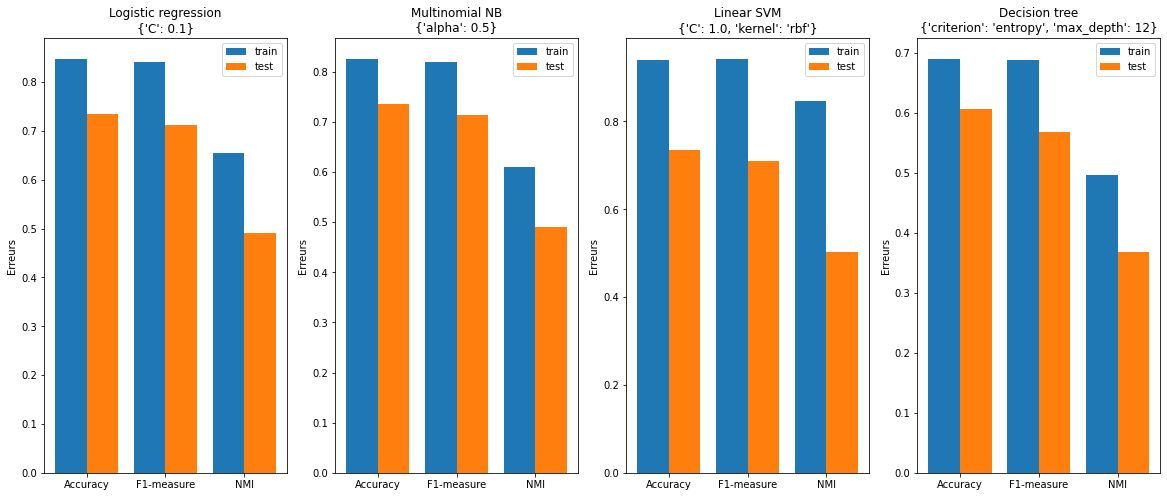

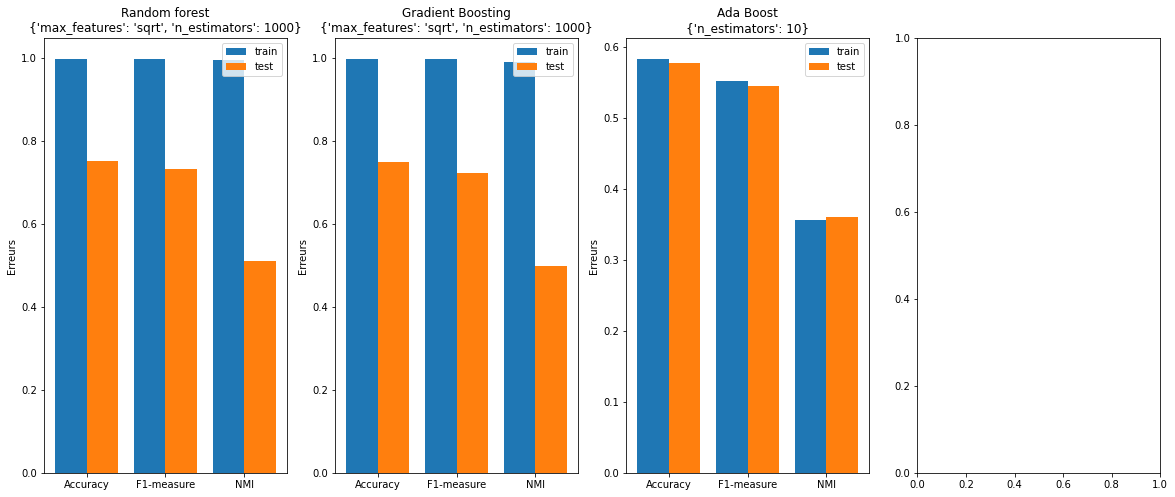

In [ ]:
#plot
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

Les modéles ont une accuracy entre [0.6, 0.75], une F1 mesure entre [0.56, 0.73] et une NMI entre [0.36, 0.51] sur le données test, le SVM, random forests et gradint boosting performent le mieux. L'effort qu'on a fait dans le tuning des hyperparamétres et la selction des attributs, a participer a amélioré les performances des modéles sur les données de test.

### Une Combinaison des informations W et X

>#### M=D^(-1)*W*X

In [ ]:
#Fonction pour la construction de la matric D. D est une matrice diagonale, chaque valeur diagonale correspond à la somme des valeurs d’une ligne de W
def get_D(a):
  row,col = np.diag_indices_from(a)
  a[row,col] = a.sum(axis=1)
  a = np.array(a.diagonal())
  d = np.diag(a)
  return d

In [ ]:
D=get_D(W.to_numpy())
D.shape

(2708, 2708)

In [ ]:
#Calculer M=D^(-1)*W*X
D=get_D(W.to_numpy())
M= (inv(D).dot(W)).dot(X)
M.shape

(2708, 452)

In [ ]:
logisticreg= logisticRegression(M, Y, scoring)
logisticreg

{'best_param': {'C': 1.0},
 'name': 'Logistic regression',
 'test_NMI': 0.6407980319887558,
 'test_accuracy': 0.8356692199084652,
 'test_f1': 0.8223151028910685,
 'train_NMI': 0.9627876622928728,
 'train_accuracy': 0.9887370832784729,
 'train_f1': 0.9895648425988612}

In [ ]:
mnb= multinomialNB(M, Y, scoring)
mnb

{'best_param': {'alpha': 0.01},
 'name': 'Multinomial NB',
 'test_NMI': 0.6479574054187349,
 'test_accuracy': 0.8293975213319602,
 'test_f1': 0.8159119946446074,
 'train_NMI': 0.7120805117719387,
 'train_accuracy': 0.8771232297098124,
 'train_f1': 0.871585704978369}

In [ ]:
svm= SVM(M, Y, scoring)
svm

{'best_param': {'C': 10, 'kernel': 'rbf'},
 'name': 'Linear SVM',
 'test_NMI': 0.6996407612527481,
 'test_accuracy': 0.8629904986665393,
 'test_f1': 0.8504828038547927,
 'train_NMI': 0.9982295150834789,
 'train_accuracy': 0.9995384473132409,
 'train_f1': 0.9995998888278524}

In [ ]:
decisiontree= decisionTree(M, Y, scoring)
decisiontree

{'best_param': {'criterion': 'gini', 'max_depth': 12},
 'name': 'Decision tree',
 'test_NMI': 0.5153990844593225,
 'test_accuracy': 0.7396634631780699,
 'test_f1': 0.7233993652887647,
 'train_NMI': 0.7178074954328025,
 'train_accuracy': 0.863736454779384,
 'train_f1': 0.8624367421385866}

In [ ]:
randomforest= randomForest(M, Y, scoring)
randomforest

{'best_param': {'max_features': 'sqrt', 'n_estimators': 1000},
 'name': 'Random forest',
 'test_NMI': 0.7095623362562425,
 'test_accuracy': 0.8681654173288498,
 'test_f1': 0.8611688380148432,
 'train_NMI': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0}

In [ ]:
gradientboosting= gradientBoosting(M,Y, scoring)
gradientboosting

{'best_param': {'max_features': 'log2', 'n_estimators': 1000},
 'name': 'Gradient Boosting',
 'test_NMI': 0.7054708620005801,
 'test_accuracy': 0.8674226354093484,
 'test_f1': 0.8571752501687294,
 'train_NMI': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0}

In [ ]:
adaboost= adaBoost(M, Y, scoring)
adaboost

{'best_param': {'n_estimators': 1000},
 'name': 'Ada Boost',
 'test_NMI': 0.5032464747570401,
 'test_accuracy': 0.7222930066638928,
 'test_f1': 0.711035009851979,
 'train_NMI': 0.6132324587629425,
 'train_accuracy': 0.8092666331751219,
 'train_f1': 0.8069131764730066}

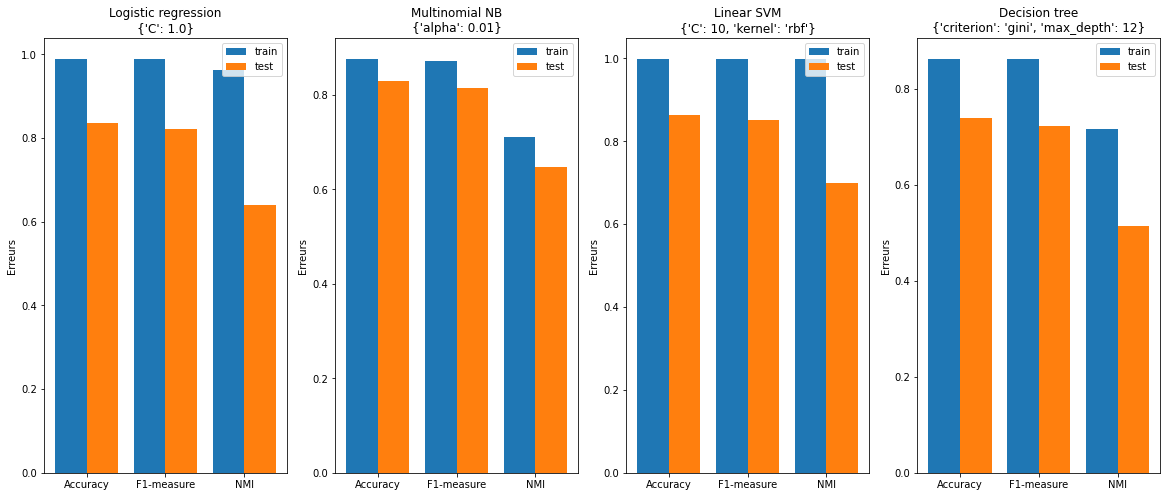

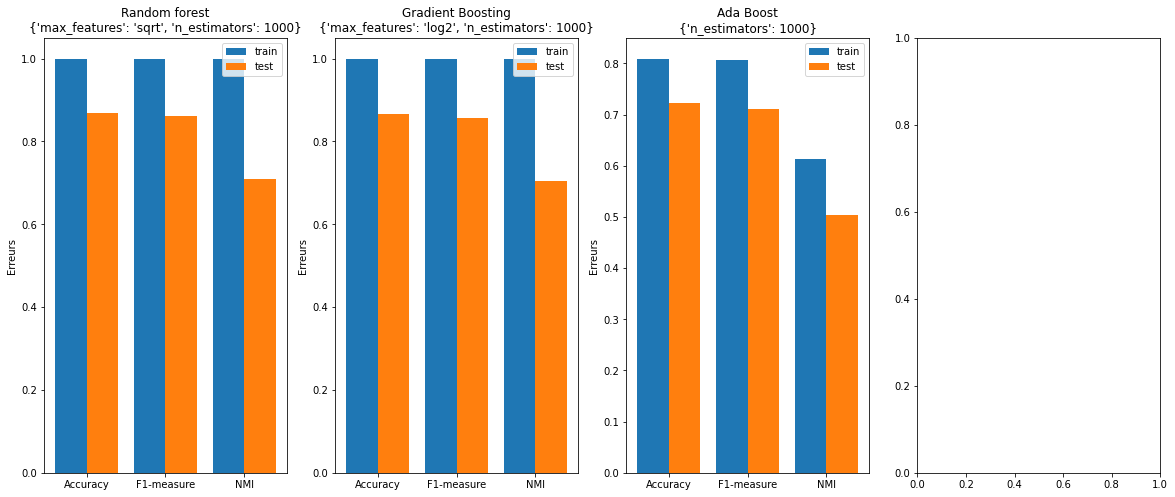

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

On remarque que les modéles en générale performent mieux sur la matrice M que sur la matrice X, avec une accuracy entre [0.7, 0.86], une F1 msure [0.71, 0.86] et une NMI entre [0.5 , 0.7] sur les données test. Le SVM, Random forest et gradient boosting ont donné les meilleures résultats, encore une fois.


>#### M=D^(-1/2)*W*D^(-1/2)*X

Ici, on a essayé une autre combinaison de la matrice D et la matrice X.

In [ ]:
from scipy.linalg import fractional_matrix_power

In [ ]:
D=get_D(W.to_numpy())
D.shape

(2708, 2708)

In [ ]:
#Calculer D^(-1/2)
D_=fractional_matrix_power(D, -0.5)
D_.shape

(2708, 2708)

In [ ]:
#Calculer M=D^(-1/2)*W*D^(-1/2)*X
D=get_D(W.to_numpy())
M= ((D_.dot(W)).dot(D_)).dot(X)
M.shape

(2708, 452)

In [ ]:
logisticreg= logisticRegression(M, Y, scoring)
logisticreg

In [ ]:
mnb= multinomialNB(M, Y, scoring)
mnb

In [ ]:
svm= SVM(M, Y, scoring)
svm

In [ ]:
decisiontree= decisionTree(M, Y, scoring)
decisiontree

In [ ]:
randomforest= randomForest(M, Y, scoring)
randomforest

In [ ]:
gradientboosting= gradientBoosting(M,Y, scoring)
gradientboosting

In [ ]:
adaboost= adaBoost(M, Y, scoring)
adaboost

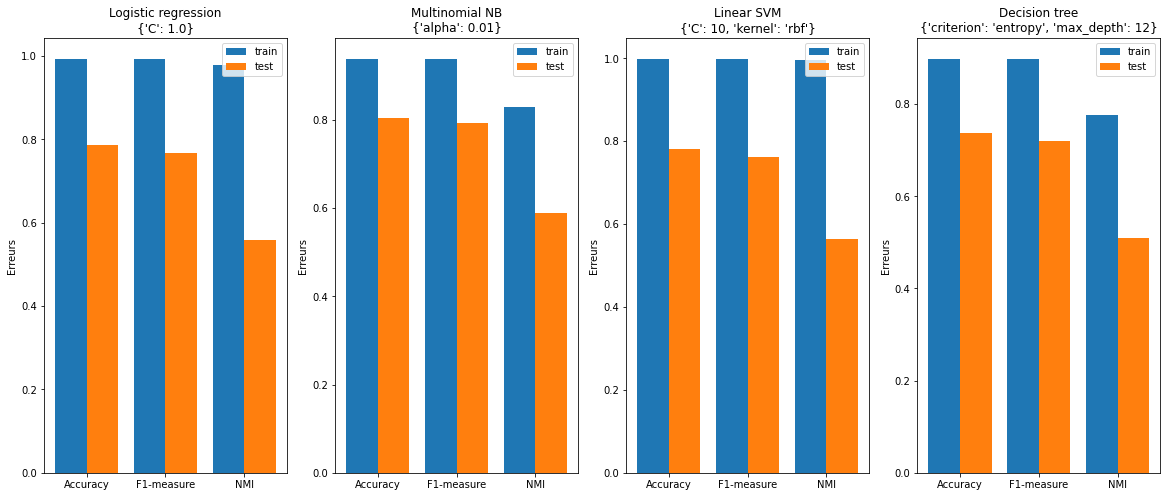

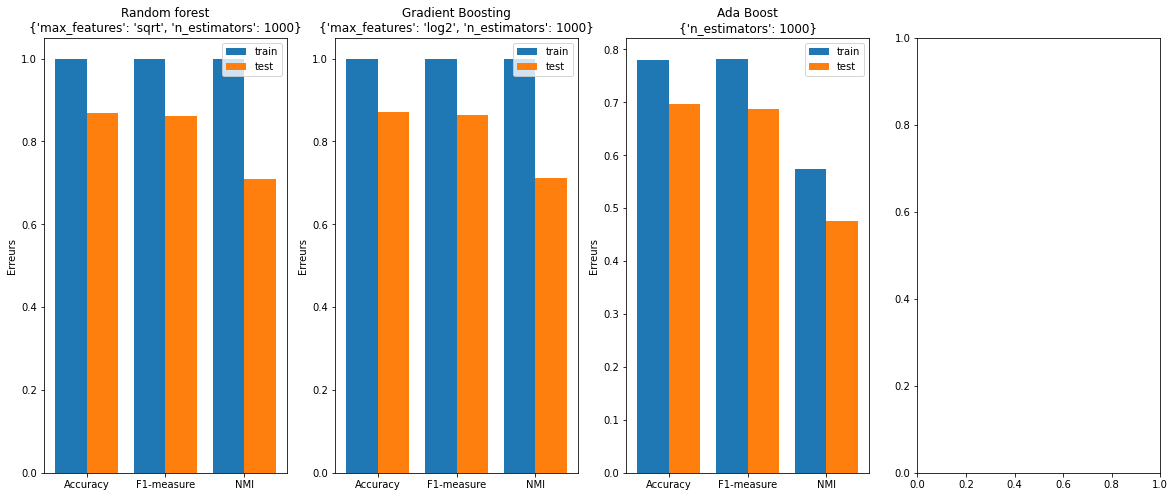

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

Cette nouvelle combinaison de la matrice X et W donne presque les mémes résultats que la combinaison précédente. Encore une fois, l'introduction des donées d'adjacence aide dans l'apprentissage des modéles, qui performent mieux que lorsqu' on utlise seulement la matrice document- terme X.

## CiteSeer


In [ ]:
mat = scipy.io.loadmat('citeseer.mat')
print(type(mat))
mat

<class 'dict'>


{'W': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 18 15:27:08 2019',
 '__version__': '1.0',
 'fea': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'gnd': array([[4],
        [2],
        [6],
        ...,
        [4],
        [2],
        [6]], dtype=uint8)}

In [ ]:
W=pd.DataFrame(mat['W'])
print("Matrice d'adjacence W :", W.shape)

X = pd.DataFrame(mat['fea'])
print("Matrice des features X :", X.shape)

Y = pd.DataFrame(mat['gnd'])
print("Les labels Y :", Y.shape)

Matrice d'adjacence W : (3327, 3327)
Matrice des features X : (3327, 3703)
Les labels Y : (3327, 1)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.99 * (1 - .99)))
X=sel.fit_transform(X)
X.shape

(3327, 668)

In [ ]:
scoring = ['accuracy', 'f1_macro', 'normalized_mutual_info_score']

### Uniquement l’information contenue dans la matrice X


In [ ]:
logisticreg= logisticRegression(X, Y, scoring)
logisticreg

{'best_param': {'C': 0.1},
 'name': 'Logistic regression',
 'test_NMI': 0.41982095941352293,
 'test_accuracy': 0.7069443879970196,
 'test_f1': 0.6675640660585753,
 'train_NMI': 0.6319822772291778,
 'train_accuracy': 0.8474598585856704,
 'train_f1': 0.8318755735610344}

In [ ]:
mnb= multinomialNB(X, Y, scoring)
mnb

{'best_param': {'alpha': 1.0},
 'name': 'Multinomial NB',
 'test_NMI': 0.4153646213491631,
 'test_accuracy': 0.7012364243943191,
 'test_f1': 0.6650116812750051,
 'train_NMI': 0.5259096335867491,
 'train_accuracy': 0.785617502557322,
 'train_f1': 0.7696939695427344}

In [ ]:
svm= SVM(X, Y, scoring)
svm

{'best_param': {'C': 10, 'kernel': 'rbf'},
 'name': 'Linear SVM',
 'test_NMI': 0.43431613731865604,
 'test_accuracy': 0.7162609225767121,
 'test_f1': 0.6812270844952832,
 'train_NMI': 0.9940404050383933,
 'train_accuracy': 0.9984971445237735,
 'train_f1': 0.9981458295500817}

In [ ]:
decisiontree= decisionTree(X, Y, scoring)
decisiontree

{'best_param': {'criterion': 'gini', 'max_depth': 12},
 'name': 'Decision tree',
 'test_NMI': 0.316297323965398,
 'test_accuracy': 0.5879184447605501,
 'test_f1': 0.5282577205109883,
 'train_NMI': 0.513797027458644,
 'train_accuracy': 0.730613268823598,
 'train_f1': 0.692746656283878}

In [ ]:
randomforest= randomForest(X, Y, scoring)
randomforest

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'best_param': {'max_features': 'log2', 'n_estimators': 1000},
 'name': 'Random forest',
 'test_NMI': 0.4563064870532135,
 'test_accuracy': 0.7288870825712931,
 'test_f1': 0.6803218479369699,
 'train_NMI': 0.9957828085812921,
 'train_accuracy': 0.9989480181072231,
 'train_f1': 0.9988197803817684}

In [ ]:
gradientboosting= gradientBoosting(X,Y, scoring)
gradientboosting

{'best_param': {'max_features': 'sqrt', 'n_estimators': 1000},
 'name': 'Gradient Boosting',
 'test_NMI': 0.4248328685949622,
 'test_accuracy': 0.7108469371627267,
 'test_f1': 0.678477701090507,
 'train_NMI': 0.9946148489275346,
 'train_accuracy': 0.9986474357182565,
 'train_f1': 0.9983798819528887}

In [ ]:
adaboost= adaBoost(X, Y, scoring)
adaboost

{'best_param': {'n_estimators': 100},
 'name': 'Ada Boost',
 'test_NMI': 0.3092230793463188,
 'test_accuracy': 0.6170742170742171,
 'test_f1': 0.5813667331812012,
 'train_NMI': 0.3606540976133535,
 'train_accuracy': 0.6637357766169715,
 'train_f1': 0.6328062127838412}

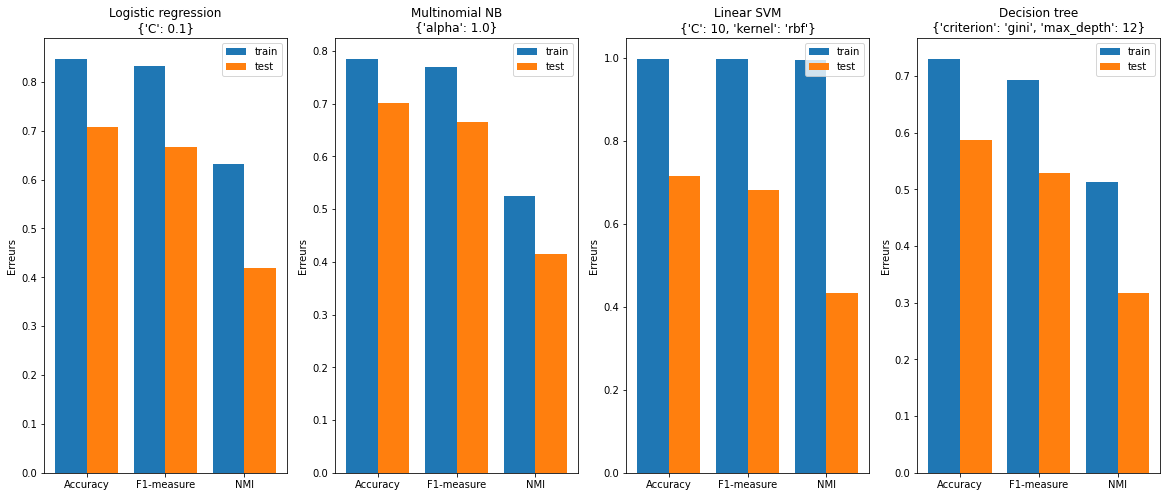

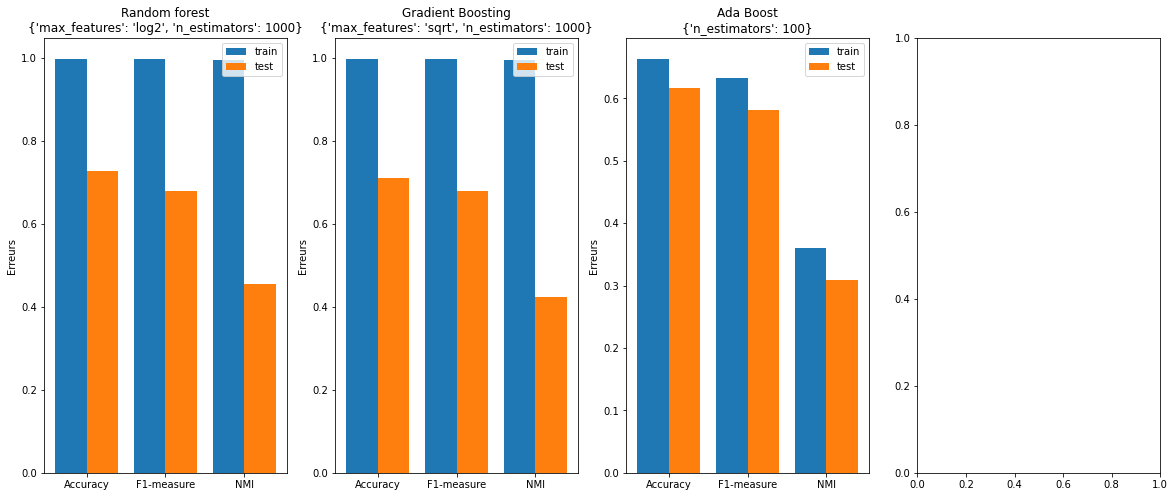

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

L'accuracy pour ce dataset est entre [0.58, 0.72], le F1 score entre [0.52, 0.68]et la NMI entre [0.3, 0.45]. SVM, random forest et gradient forest donnent les meilleures résultats, comme avec le dataset CORA.






### Une Combinaison des informations W et X

> #### M=D^(-1)*W*X

In [ ]:
def get_D(a):
  row,col = np.diag_indices_from(a)
  a[row,col] = a.sum(axis=1)
  a = np.array(a.diagonal())
  d = np.diag(a)
  return d

In [ ]:
D=get_D(W.to_numpy())
D.shape

(3327, 3327)

In [ ]:
#Calculer M=D^(-1)*W*X
D=get_D(W.to_numpy())
M= (inv(D).dot(W)).dot(X)
M.shape

(3327, 668)

In [ ]:
logisticreg= logisticRegression(M, Y, scoring)
logisticreg

{'best_param': {'C': 0.1},
 'name': 'Logistic regression',
 'test_NMI': 0.4920544534146697,
 'test_accuracy': 0.7517252590936803,
 'test_f1': 0.7161133243500861,
 'train_NMI': 0.6955824200893063,
 'train_accuracy': 0.8781185846369818,
 'train_f1': 0.862971600386477}

In [ ]:
mnb= multinomialNB(M, Y, scoring)
mnb

{'best_param': {'alpha': 1.0},
 'name': 'Multinomial NB',
 'test_NMI': 0.4817655047299626,
 'test_accuracy': 0.7427076700760912,
 'test_f1': 0.7079607905993626,
 'train_NMI': 0.5423869182939012,
 'train_accuracy': 0.792530953972157,
 'train_f1': 0.7733437028414896}

In [ ]:
svm= SVM(M, Y, scoring)
svm

{'best_param': {'C': 1.0, 'kernel': 'rbf'},
 'name': 'Linear SVM',
 'test_NMI': 0.5199448889560578,
 'test_accuracy': 0.7691584817900606,
 'test_f1': 0.7268110336255262,
 'train_NMI': 0.8167908427066864,
 'train_accuracy': 0.933648654028428,
 'train_f1': 0.9248926405223751}

In [ ]:
decisiontree= decisionTree(M, Y, scoring)
decisiontree

{'best_param': {'criterion': 'gini', 'max_depth': 12},
 'name': 'Decision tree',
 'test_NMI': 0.33287962865045806,
 'test_accuracy': 0.6275937591727067,
 'test_f1': 0.5859054451840217,
 'train_NMI': 0.6699749749663404,
 'train_accuracy': 0.8502395257088857,
 'train_f1': 0.8265546141576614}

In [ ]:
randomforest= randomForest(M, Y, scoring)
randomforest

{'best_param': {'max_features': 'log2', 'n_estimators': 1000},
 'name': 'Random forest',
 'test_NMI': 0.5097445312019168,
 'test_accuracy': 0.7619422429948746,
 'test_f1': 0.7116196330186086,
 'train_NMI': 0.997020338732835,
 'train_accuracy': 0.9992485722618867,
 'train_f1': 0.9990863134795331}

In [ ]:
gradientboosting= gradientBoosting(M,Y, scoring)
gradientboosting

{'best_param': {'max_features': 'log2', 'n_estimators': 100},
 'name': 'Gradient Boosting',
 'test_NMI': 0.496001900889606,
 'test_accuracy': 0.7526279663121768,
 'test_f1': 0.7062675435348329,
 'train_NMI': 0.6881084083890704,
 'train_accuracy': 0.8748116136722917,
 'train_f1': 0.8607973537444955}

In [ ]:
adaboost= adaBoost(M, Y, scoring)
adaboost

{'best_param': {'n_estimators': 1000},
 'name': 'Ada Boost',
 'test_NMI': 0.38765415126639735,
 'test_accuracy': 0.6660574860574859,
 'test_f1': 0.6367749216610357,
 'train_NMI': 0.5545061448330063,
 'train_accuracy': 0.7908032969760214,
 'train_f1': 0.774370482339866}

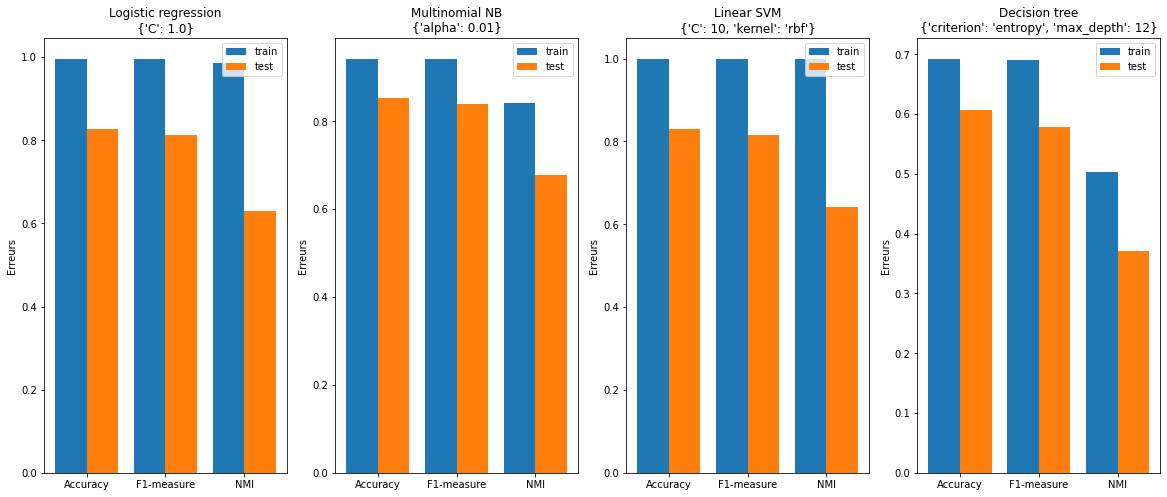

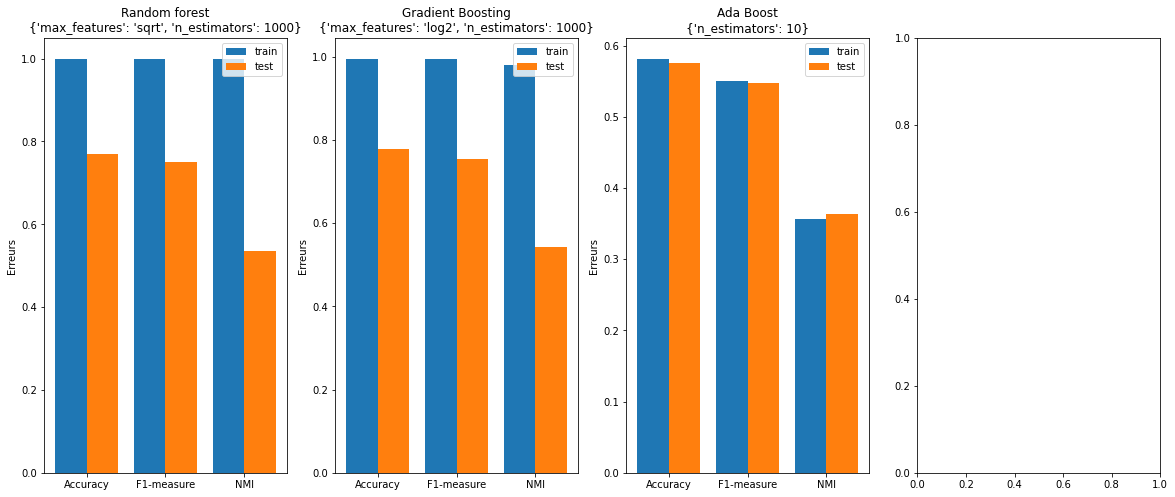

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

L'introduction des données d'djacence (lien entre les document) permet d'améliorer les réusltats. Accurarcy entre [0.62, 0.77], F1 mesure entre [0.52, 0.72] et une NMI entre [0.33 ,0.51]. Les modéles SVM, random forest, gradient boosting performent le mieux.

> #### M=D^(-1/2)*W*D^(-1/2)*X

In [ ]:
from scipy.linalg import fractional_matrix_power

In [ ]:
D=get_D(W.to_numpy())
D.shape

(3327, 3327)

In [ ]:
D_=fractional_matrix_power(D, -0.5) #D^(-1/2)
D_.shape

(3327, 3327)

In [ ]:
#Calculer M=D^(-1/2)*W*D^(-1/2)*X
D=get_D(W.to_numpy())
M= ((D_.dot(W)).dot(D_)).dot(X)
M.shape

(3327, 668)

In [ ]:
logisticreg= logisticRegression(M, Y, scoring)
logisticreg

{'best_param': {'C': 0.1},
 'name': 'Logistic regression',
 'test_NMI': 0.45695583043647814,
 'test_accuracy': 0.7315906884327936,
 'test_f1': 0.6959842151909685,
 'train_NMI': 0.7268379831812574,
 'train_accuracy': 0.8956268452881607,
 'train_f1': 0.88489580042369}

In [ ]:
mnb= multinomialNB(M, Y, scoring)
mnb

{'best_param': {'alpha': 10.0},
 'name': 'Multinomial NB',
 'test_NMI': 0.4662075158978286,
 'test_accuracy': 0.7318873760979023,
 'test_f1': 0.6744607535142622,
 'train_NMI': 0.5248432849565383,
 'train_accuracy': 0.7783284784449449,
 'train_f1': 0.7412624964354793}

In [ ]:
svm= SVM(M, Y, scoring)
svm

{'best_param': {'C': 10, 'kernel': 'rbf'},
 'name': 'Linear SVM',
 'test_NMI': 0.48217296394080583,
 'test_accuracy': 0.7490275237643659,
 'test_f1': 0.720117270020979,
 'train_NMI': 0.994624566034647,
 'train_accuracy': 0.9986474357182568,
 'train_f1': 0.9983647433793813}

In [ ]:
decisiontree= decisionTree(M, Y, scoring)
decisiontree

{'best_param': {'criterion': 'gini', 'max_depth': 12},
 'name': 'Decision tree',
 'test_NMI': 0.33840292902634683,
 'test_accuracy': 0.6293969157127052,
 'test_f1': 0.5916792040259113,
 'train_NMI': 0.6604131423646248,
 'train_accuracy': 0.8426505121279038,
 'train_f1': 0.8231648782844561}

In [ ]:
randomforest= randomForest(M, Y, scoring)
randomforest

{'best_param': {'max_features': 'log2', 'n_estimators': 1000},
 'name': 'Random forest',
 'test_NMI': 0.5124569145743274,
 'test_accuracy': 0.7628444986339724,
 'test_f1': 0.7138521015058465,
 'train_NMI': 0.9970201857813686,
 'train_accuracy': 0.9992485722618867,
 'train_f1': 0.9990856609718284}

In [ ]:
gradientboosting= gradientBoosting(M,Y, scoring)
gradientboosting

{'best_param': {'max_features': 'sqrt', 'n_estimators': 100},
 'name': 'Gradient Boosting',
 'test_NMI': 0.49798383998714113,
 'test_accuracy': 0.7526288694709746,
 'test_f1': 0.709318751837815,
 'train_NMI': 0.7345538147684006,
 'train_accuracy': 0.898181005033894,
 'train_f1': 0.8869244538509818}

In [ ]:
adaboost= adaBoost(M, Y, scoring)
adaboost

{'best_param': {'n_estimators': 1000},
 'name': 'Ada Boost',
 'test_NMI': 0.39278416799353855,
 'test_accuracy': 0.6702779471200524,
 'test_f1': 0.6448875028485934,
 'train_NMI': 0.5665849407151619,
 'train_accuracy': 0.7991444723869929,
 'train_f1': 0.7833186993473644}

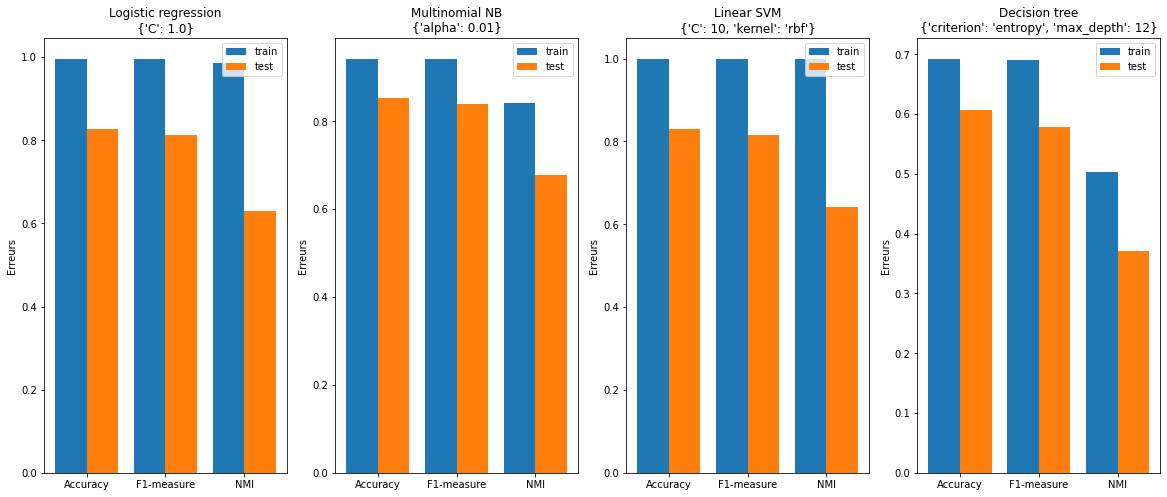

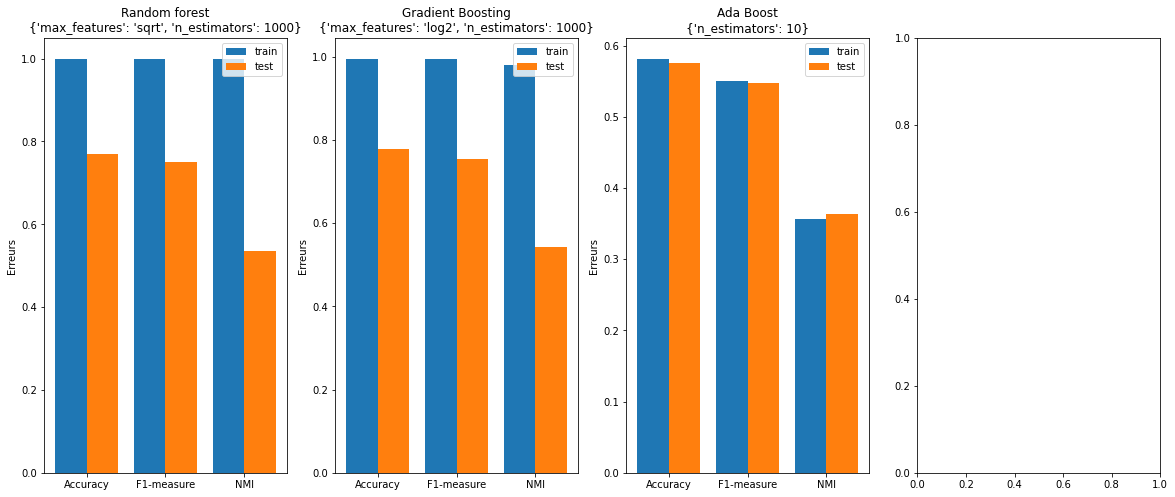

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

Résultats trés proche que la combinaison précédente.

## PubMed

In [ ]:
mat = scipy.io.loadmat('pubmed.mat')
print(type(mat))
mat

<class 'dict'>


{'W': <19717x19717 sparse matrix of type '<class 'numpy.float64'>'
 	with 88651 stored elements in Compressed Sparse Column format>,
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 30 19:12:21 2019',
 '__version__': '1.0',
 'fea': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10463634, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.01942665, 0.0079607 , ..., 0.        , 0.        ,
         0.        ],
        [0.10782092, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.02658384, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 'gnd': array([[2],
        [2],
        [1],
        ...,
        [3],
        [1],
        [3]], dtype=uint8)}

In [ ]:
W=pd.DataFrame(mat['W'].todense()) #Transformer W une matrice compressé à une matrice dense
print("Matrice d'adjacence W :", W.shape)

X = pd.DataFrame(mat['fea'])
print("Matrice des features X :", X.shape)

Y = pd.DataFrame(mat['gnd'])
print("Les labels Y :", Y.shape)

Matrice d'adjacence W : (19717, 19717)
Matrice des features X : (19717, 500)
Les labels Y : (19717, 1)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.999 * (1 - .999)))
X=sel.fit_transform(X)
X.shape

(19717, 13)

In [ ]:
scoring = ['accuracy', 'f1_macro', 'normalized_mutual_info_score']

### Uniquement l’information contenue dans la matrice X


In [ ]:
logisticreg= logisticRegression(X, Y, scoring)
logisticreg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'best_param': {'C': 100},
 'name': 'Logistic regression',
 'test_NMI': 0.30720499353176456,
 'test_accuracy': 0.7060904141624642,
 'test_f1': 0.7013193397432869,
 'train_NMI': 0.30757533660758773,
 'train_accuracy': 0.7061418453361201,
 'train_f1': 0.7014699191368289}

In [ ]:
mnb= multinomialNB(X, Y, scoring)
mnb

{'best_param': {'alpha': 0.01},
 'name': 'Multinomial NB',
 'test_NMI': 0.24420676746980283,
 'test_accuracy': 0.4232895973504796,
 'test_f1': 0.2782157280683001,
 'train_NMI': 0.24314614543262084,
 'train_accuracy': 0.4241009783704559,
 'train_f1': 0.27873512844334747}

In [ ]:
svm= SVM(X, Y, scoring)
svm

In [ ]:
decisiontree= decisionTree(X, Y, scoring)
decisiontree

In [ ]:
randomforest= randomForest(X, Y, scoring)
randomforest

In [ ]:
gradientboosting= gradientBoosting(X,Y, scoring)
gradientboosting

In [ ]:
adaboost= adaBoost(X, Y, scoring)
adaboost

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

### Une Combinaison des informations W et X

> #### M=D^(-1)*W*X

In [ ]:
def get_D(a):
  row,col = np.diag_indices_from(a)
  a[row,col] = a.sum(axis=1)
  a = np.array(a.diagonal())
  d = np.diag(a)
  return d

In [ ]:
D=get_D(W.to_numpy())
D.shape

(3327, 3327)

In [ ]:
#Calculer M=D^(-1)*W*X
D=get_D(W.to_numpy())
M= (inv(D).dot(W)).dot(X)
M.shape

(3327, 668)

In [ ]:
logisticreg= logisticRegression(M, Y, scoring)
logisticreg

In [ ]:
mnb= multinomialNB(M, Y, scoring)
mnb

In [ ]:
svm= SVM(M, Y, scoring)
svm

In [ ]:
decisiontree= decisionTree(M, Y, scoring)
decisiontree

In [ ]:
randomforest= randomForest(M, Y, scoring)
randomforest

In [ ]:
gradientboosting= gradientBoosting(M,Y, scoring)
gradientboosting

In [ ]:
adaboost= adaBoost(M, Y, scoring)
adaboost

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

> #### M=D^(-1/2)*W*D^(-1/2)*X

In [ ]:
from scipy.linalg import fractional_matrix_power

In [ ]:
D=get_D(W.to_numpy())
D.shape

(3327, 3327)

In [ ]:
D_=fractional_matrix_power(D, -0.5) #D^(-1/2)
D_.shape

(3327, 3327)

In [ ]:
#Calculer M=D^(-1/2)*W*D^(-1/2)*X
D=get_D(W.to_numpy())
M= ((D_.dot(W)).dot(D_)).dot(X)
M.shape

(3327, 668)

In [ ]:
logisticreg= logisticRegression(M, Y, scoring)
logisticreg

In [ ]:
mnb= multinomialNB(M, Y, scoring)
mnb

In [ ]:
svm= SVM(M, Y, scoring)
svm

In [ ]:
decisiontree= decisionTree(M, Y, scoring)
decisiontree

In [ ]:
randomforest= randomForest(M, Y, scoring)
randomforest

In [ ]:
gradientboosting= gradientBoosting(M,Y, scoring)
gradientboosting

In [ ]:
adaboost= adaBoost(M, Y, scoring)
adaboost

In [ ]:
plot_results(logisticreg, mnb, svm, decisiontree, randomforest, gradientboosting, adaboost )

Ce dataset contient 19717 documents, 500 termes et 44338 liens, ce qui a rendu les calculs trés compliqués, et malgrés la selction de 13 attributs seulement, la mémoire sur Colab n'était pas suffisante pour faire les calculs (surtout l'inverse de la matrice liens D).   
Le type de vectorisation des document étant la TF-IDF qui prend en compte le poids du terme dans un document par rapport à tout le corpus, et ne se résume pas à un simple comptage comme Bag of words, on s'attendait donc à avoir de meilleures résultats qu'avec les 2 premiers dataset.